# MACHINE LEARNING

## TASK 4

### Problem Description
A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

• Which variables are significant in predicting the price of a car

• How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.


### Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.


In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import xticks

In [2]:
## Read Dataset
Car=pd.read_csv("I:\ENTRI\Entri ML\ML Task 4\CarPrice_Assignment.csv")
Car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
Car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
Car.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


## Data Checking

In [5]:
Car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
#shape
Car.shape

(205, 26)

In [7]:
Car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
# Numerical columns
num_cols = Car.select_dtypes(include='number').columns
print(num_cols)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [87]:
# Categorical columns
cat_cols = Car.select_dtypes(include='object').columns
print(cat_cols )

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'Brand', 'brand_category'],
      dtype='object')


In [11]:
# finding missing values
Car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
Car.duplicated().sum()

0

##### There is no duplicate values

## Exploratory Data Analysis (EDA)


#### Price : Target Variable

In [13]:
Car.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

C:\Users\NOEL STERVIN\AppData\Local\Temp\ipykernel_43860\2654537556.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Car['price'])


<Axes: xlabel='price', ylabel='Density'>

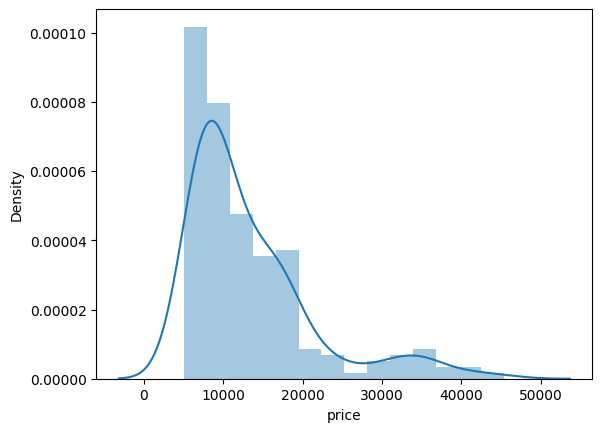

In [14]:
sns.distplot(Car['price'])

### Inference:
Mean and median of price are significantly different.
Large standard deviation indicates that there is considerable variance in the prices of the automobiles.
Price values are right-skewed, most cars are priced at the lower end  of the price range.

### Symboling

##### Symboling : Its assigned insurance risk rating
#####            A value of +3 indicates that the auto is risky,
#####             -3 that it is probably pretty safe.(Categorical)

In [16]:
# Let's see the count of automobile in each category and percent share of each category.

C:\Users\NOEL STERVIN\AppData\Local\Temp\ipykernel_43860\3451340193.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt1 = sns.countplot(x='symboling', data=Car,palette=custom_colors)


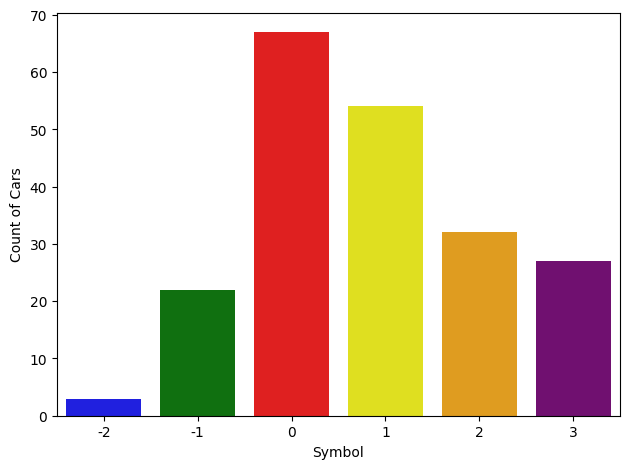

In [17]:
Sym = Car['symboling'].unique()

# Define custom colors for each unique symboling value
custom_colors = ['blue', 'green', 'red', 'yellow', 'orange', 'purple']

plt1 = sns.countplot(x='symboling', data=Car,palette=custom_colors)
plt1.set(xlabel='Symbol', ylabel='Count of Cars')
plt.tight_layout()
plt.show()

In [18]:
# Let's see average price of cars in each symbol category.

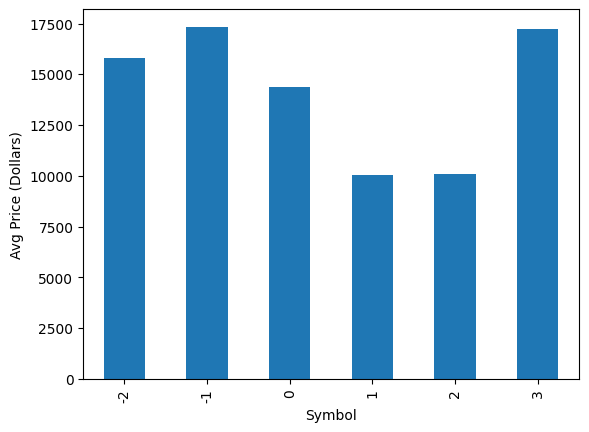

In [19]:
plt1 = Car[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show()

### Inference:
More than 50% of cars are with symbol 0 or 1.
Average price of car is lower for 1 & 2 symbol category.

In [21]:
Car.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

### Splitting car company name from Car Model


In [22]:
Car['Brand'] = Car.CarName.str.split(' ').str.get(0).str.upper()
Car['Brand']

0      ALFA-ROMERO
1      ALFA-ROMERO
2      ALFA-ROMERO
3             AUDI
4             AUDI
          ...     
200          VOLVO
201          VOLVO
202          VOLVO
203          VOLVO
204          VOLVO
Name: Brand, Length: 205, dtype: object

In [23]:
Car.Brand.unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE',
       'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA', 'TOYOUTA',
       'VOKSWAGEN', 'VOLKSWAGEN', 'VW', 'VOLVO'], dtype=object)

In [24]:
##### It's noticed that in brand names,VOLKSWAGON has three different values as VOLKSWAGEN, VOKSWAGEN and VW and MAZDA is also spelled as MAXDA ,also PORSCHE as PORSCHE and PORCSCHE.
# Let's fix these data issues.
Car['Brand']  = Car['Brand'] .replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
Car['Brand']  = Car['Brand'] .replace(['MAXDA'], 'MAZDA')
Car['Brand']  = Car['Brand'] .replace(['PORCSHCE'], 'PORSCHE')
Car['Brand']  = Car['Brand'] .replace(['TOYOUTA'], 'TOYOTA')

In [25]:
Car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,VOLVO
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,VOLVO
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,VOLVO
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,VOLVO


### The Carname column is not needed and also the Car id is not relevant. So Lets drop the Carname column and also Id column

In [26]:
Car.drop(columns=['car_ID','CarName'])

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,VOLVO
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,VOLVO
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,VOLVO
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,VOLVO


In [27]:
Car.Brand.describe()

count        205
unique        22
top       TOYOTA
freq          32
Name: Brand, dtype: object

In [28]:
Car.groupby(Car.Brand).size().sort_values(ascending =False)

Brand
TOYOTA         32
NISSAN         18
MAZDA          17
MITSUBISHI     13
HONDA          13
VOLKSWAGEN     12
SUBARU         12
PEUGEOT        11
VOLVO          11
DODGE           9
BUICK           8
BMW             8
AUDI            7
PLYMOUTH        7
SAAB            6
PORSCHE         5
ISUZU           4
JAGUAR          3
CHEVROLET       3
ALFA-ROMERO     3
RENAULT         2
MERCURY         1
dtype: int64

In [29]:
# Let's see average car price of each company.

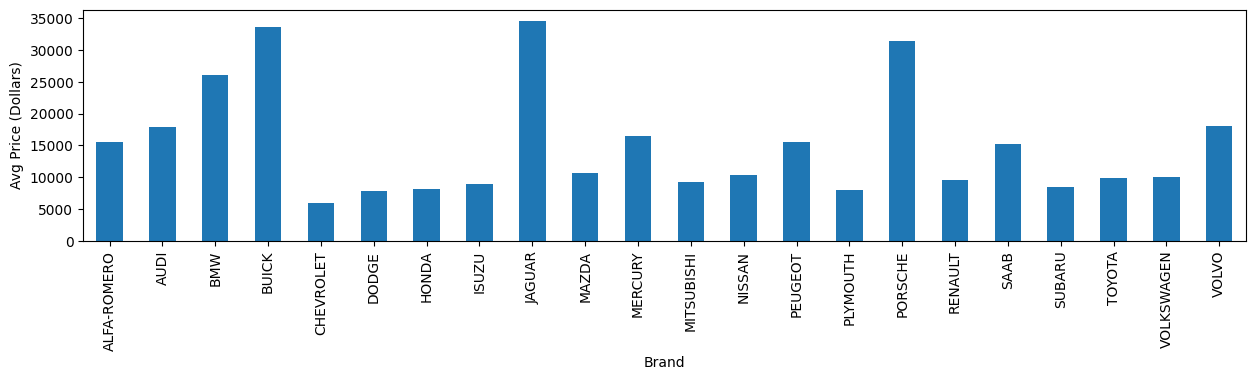

In [30]:
Car_comp_avg_price = Car[['Brand','price']].groupby("Brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = Car_comp_avg_price.plot(x = 'Brand', kind='bar',legend = False, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show()

In [31]:
# Merge the average prices back into the original DataFrame with explicit suffixes
Car = Car.merge(Car_comp_avg_price, on='Brand', suffixes=('_original', '_avg'))

# Create the 'brand_category' column based on the 'brand_avg_price' values
Car['brand_category'] = Car['brand_avg_price'].apply(lambda x: "Budget" if x < 10000 
                                                   else ("Mid_Range" if 10000 <= x < 20000
                                                         else "Luxury"))



In [32]:
Car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,brand_avg_price,brand_category
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO,15498.333333,Mid_Range
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO,15498.333333,Mid_Range
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO,15498.333333,Mid_Range
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,AUDI,17859.166714,Mid_Range
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,AUDI,17859.166714,Mid_Range


### Inference:
Toyota has considerably high no of models in the market.
Brands can be categorised as Luxury, Mid Ranged, Budget based on their average price.
Some of the Luxury brands are JAGUAR,PORSCHE and BUICK

#### Fuel Type

In [34]:
typeoffuel=['gas','diesel']
Car.loc[Car.fueltype.isin(typeoffuel)].head(10)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,brand_avg_price,brand_category
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.000,ALFA-ROMERO,15498.333333,Mid_Range
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.000,ALFA-ROMERO,15498.333333,Mid_Range
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.000,ALFA-ROMERO,15498.333333,Mid_Range
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.000,AUDI,17859.166714,Mid_Range
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.000,AUDI,17859.166714,Mid_Range
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.5,110,5500,19,25,15250.000,AUDI,17859.166714,Mid_Range
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,3.40,8.5,110,5500,19,25,17710.000,AUDI,17859.166714,Mid_Range
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,3.40,8.5,110,5500,19,25,18920.000,AUDI,17859.166714,Mid_Range
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,3.40,8.3,140,5500,17,20,23875.000,AUDI,17859.166714,Mid_Range
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,3.40,7.0,160,5500,16,22,17859.167,AUDI,17859.166714,Mid_Range


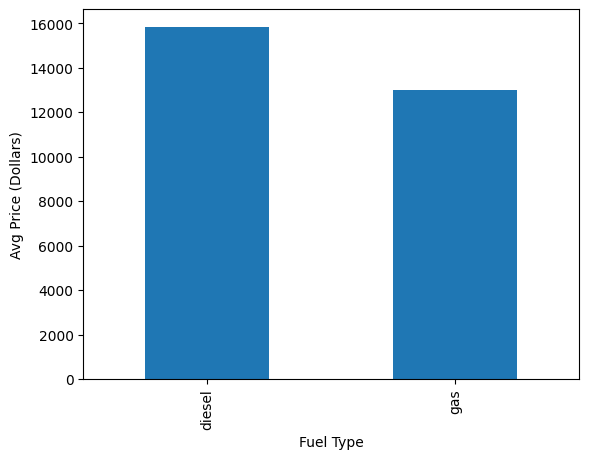

In [35]:
Car_fuel_avg_price = Car[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = Car_fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = False)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show()

### Inference:
Diesel cars are priced more than gas cars.

### Aspiration

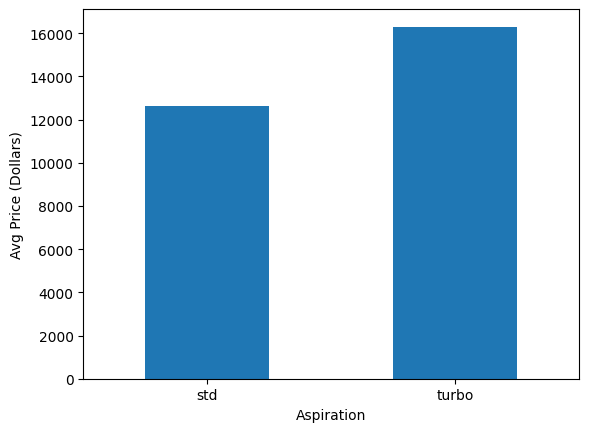

In [36]:
Car_aspir_avg_price = Car[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 =Car_aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = False)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

### Inference:
Cars with turbo aspiration engine are priced more than standard ones.


#### Door number

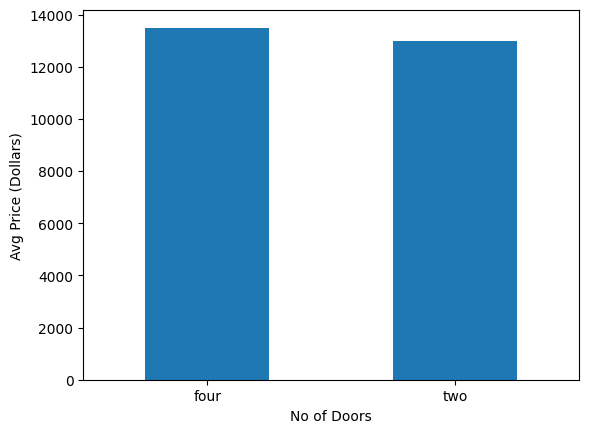

In [38]:
Car_door_avg_price = Car[['doornumber','price']].groupby("doornumber", as_index = False).mean().rename(columns={'price':'door_avg_price'})
plt1 = Car_door_avg_price.plot(x = 'doornumber', kind='bar',legend = False)
plt1.set_xlabel("No of Doors")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

### Inference:
Number of doors doesn't seem to have much effect on price.

### Car Body

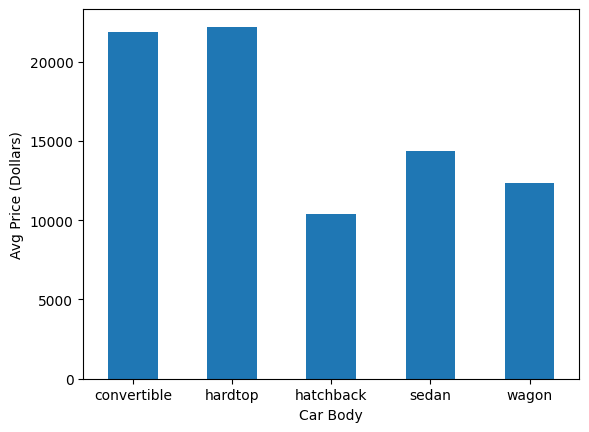

In [40]:
Car_body_avg_price = Car[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = Car_body_avg_price.plot(x = 'carbody', kind='bar',legend = False)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show() 

### Inference:
Hardtop and convertible are the most expensive whereas hatchbacks are the cheapest.

### Drivewheel

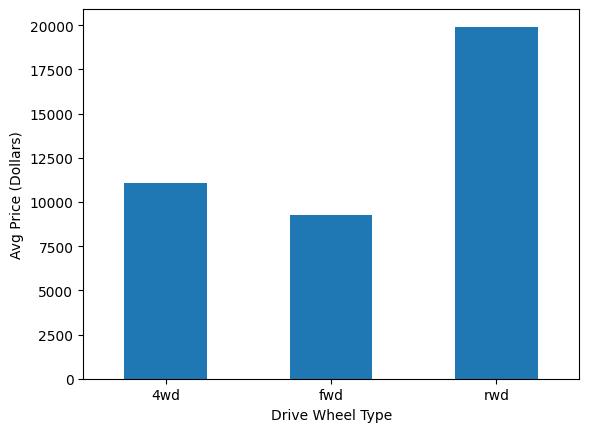

In [42]:
Car_drivewheel_avg_price = Car[['drivewheel','price']].groupby("drivewheel", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = Car_drivewheel_avg_price.plot(x = 'drivewheel', kind='bar',legend = False)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

### Inference:
Cars with Rear wheel drive have a higher price value.

### Wheel base

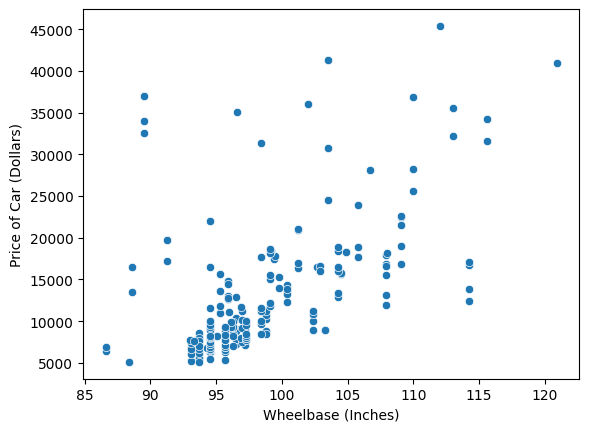

In [44]:
plt1 = sns.scatterplot(x = 'wheelbase', y = 'price', data = Car)
plt1.set_xlabel('Wheelbase (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

### Inference:
Most cars has a wheel base around 95 inches.
Price has a slight positive correlation with wheelbase.

## Car Dimensions

In [46]:
# Let's see how price varies with Car's length, width,height and weight.

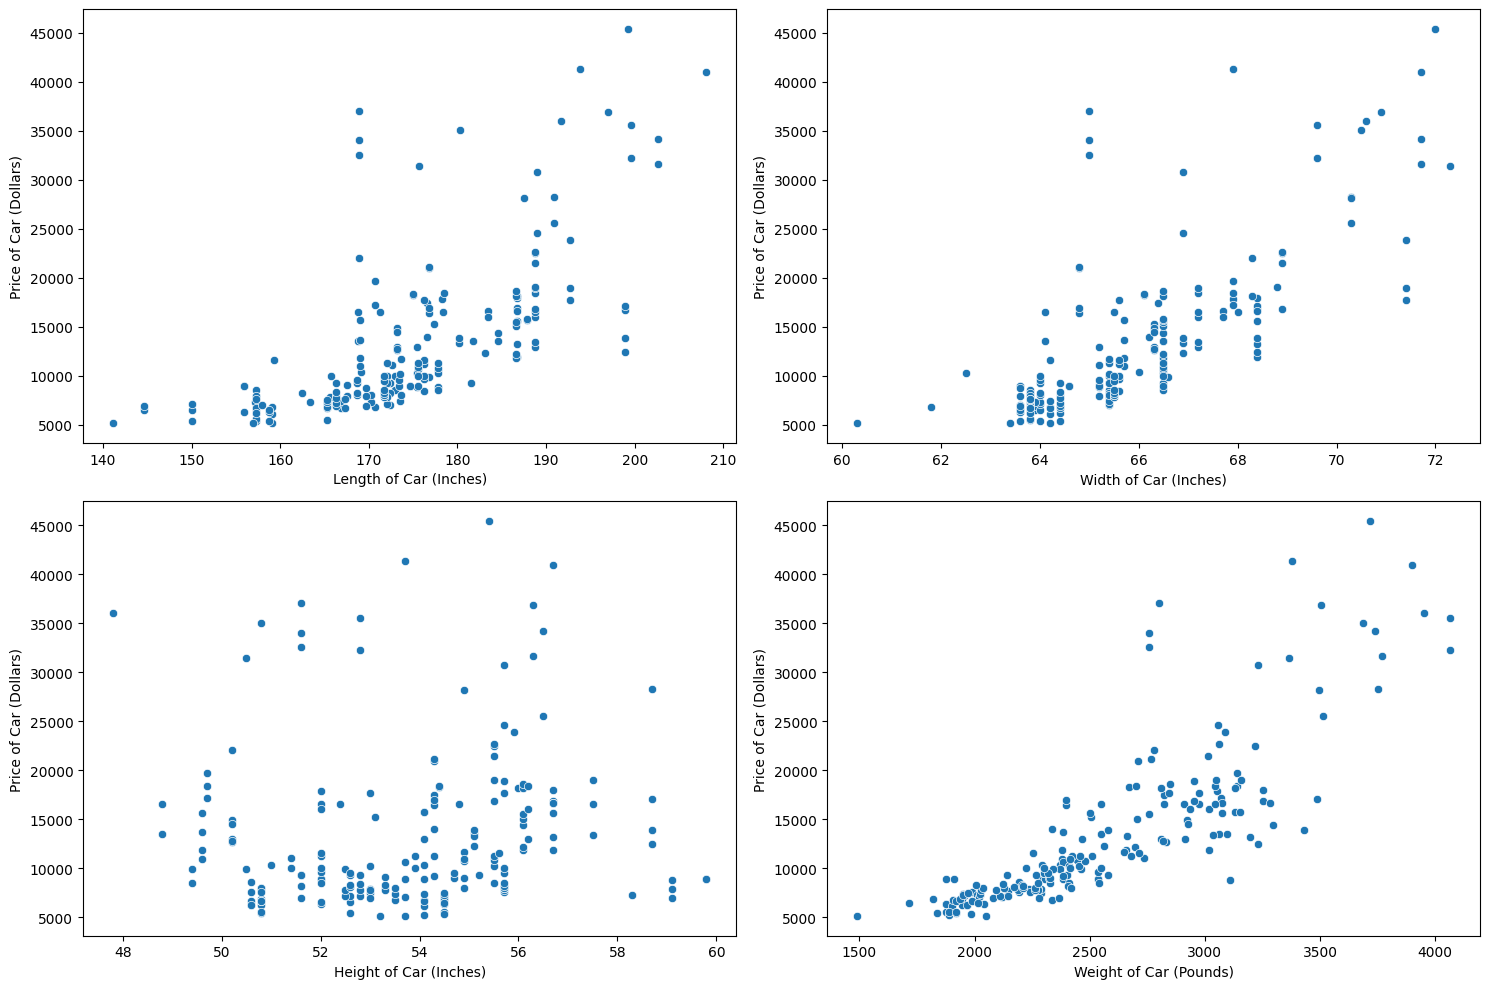

In [47]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = Car, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = Car, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = Car, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'curbweight', y = 'price', data = Car, ax = axs[1,1])
plt3.set_xlabel('Weight of Car (Pounds)')
plt3.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()

### Inference:
Length width and weight of the car is positively related with the price.
There is not much of a correlation with Height of the car with price.

## Engine Specifications

#### Engine Type, Cylinder, Fuel System

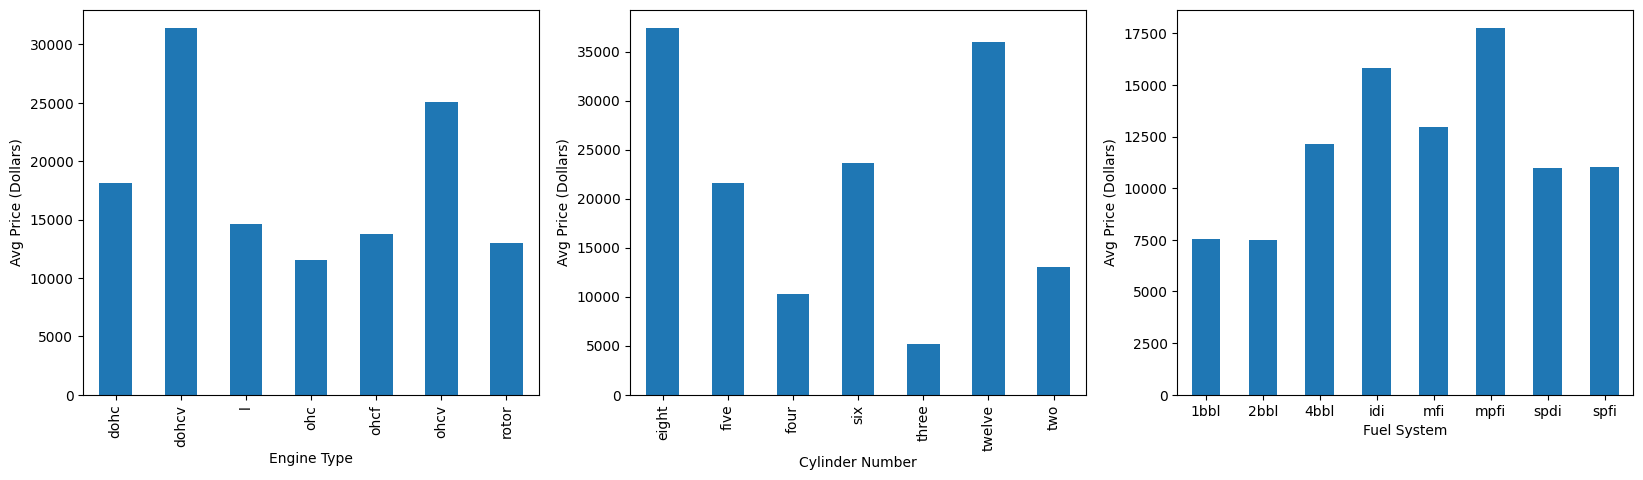

In [49]:
fig, axs = plt.subplots(1,3,figsize=(20,5))

Car_engine_avg_price = Car[['enginetype','price']].groupby("enginetype", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = Car_engine_avg_price.plot(x = 'enginetype', kind='bar', legend = False, ax = axs[0])
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)


Car_cylindernumber_avg_price = Car[['cylindernumber','price']].groupby("cylindernumber", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = Car_cylindernumber_avg_price.plot(x = 'cylindernumber', kind='bar',legend = False, ax = axs[1])
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)

Car_fuelsystem_avg_price = Car[['fuelsystem','price']].groupby("fuelsystem", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = Car_fuelsystem_avg_price.plot(x = 'fuelsystem', kind='bar',legend = False, ax = axs[2])
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

### Inference:
DOHCV and OHCV engine types are priced high.

Eight and twelve cylinder cars have higher price.

IDI and MPFI fuel system have higher price.


# Engine Size, Bore Ratio, Stroke, Horsepower & Compression Ratio

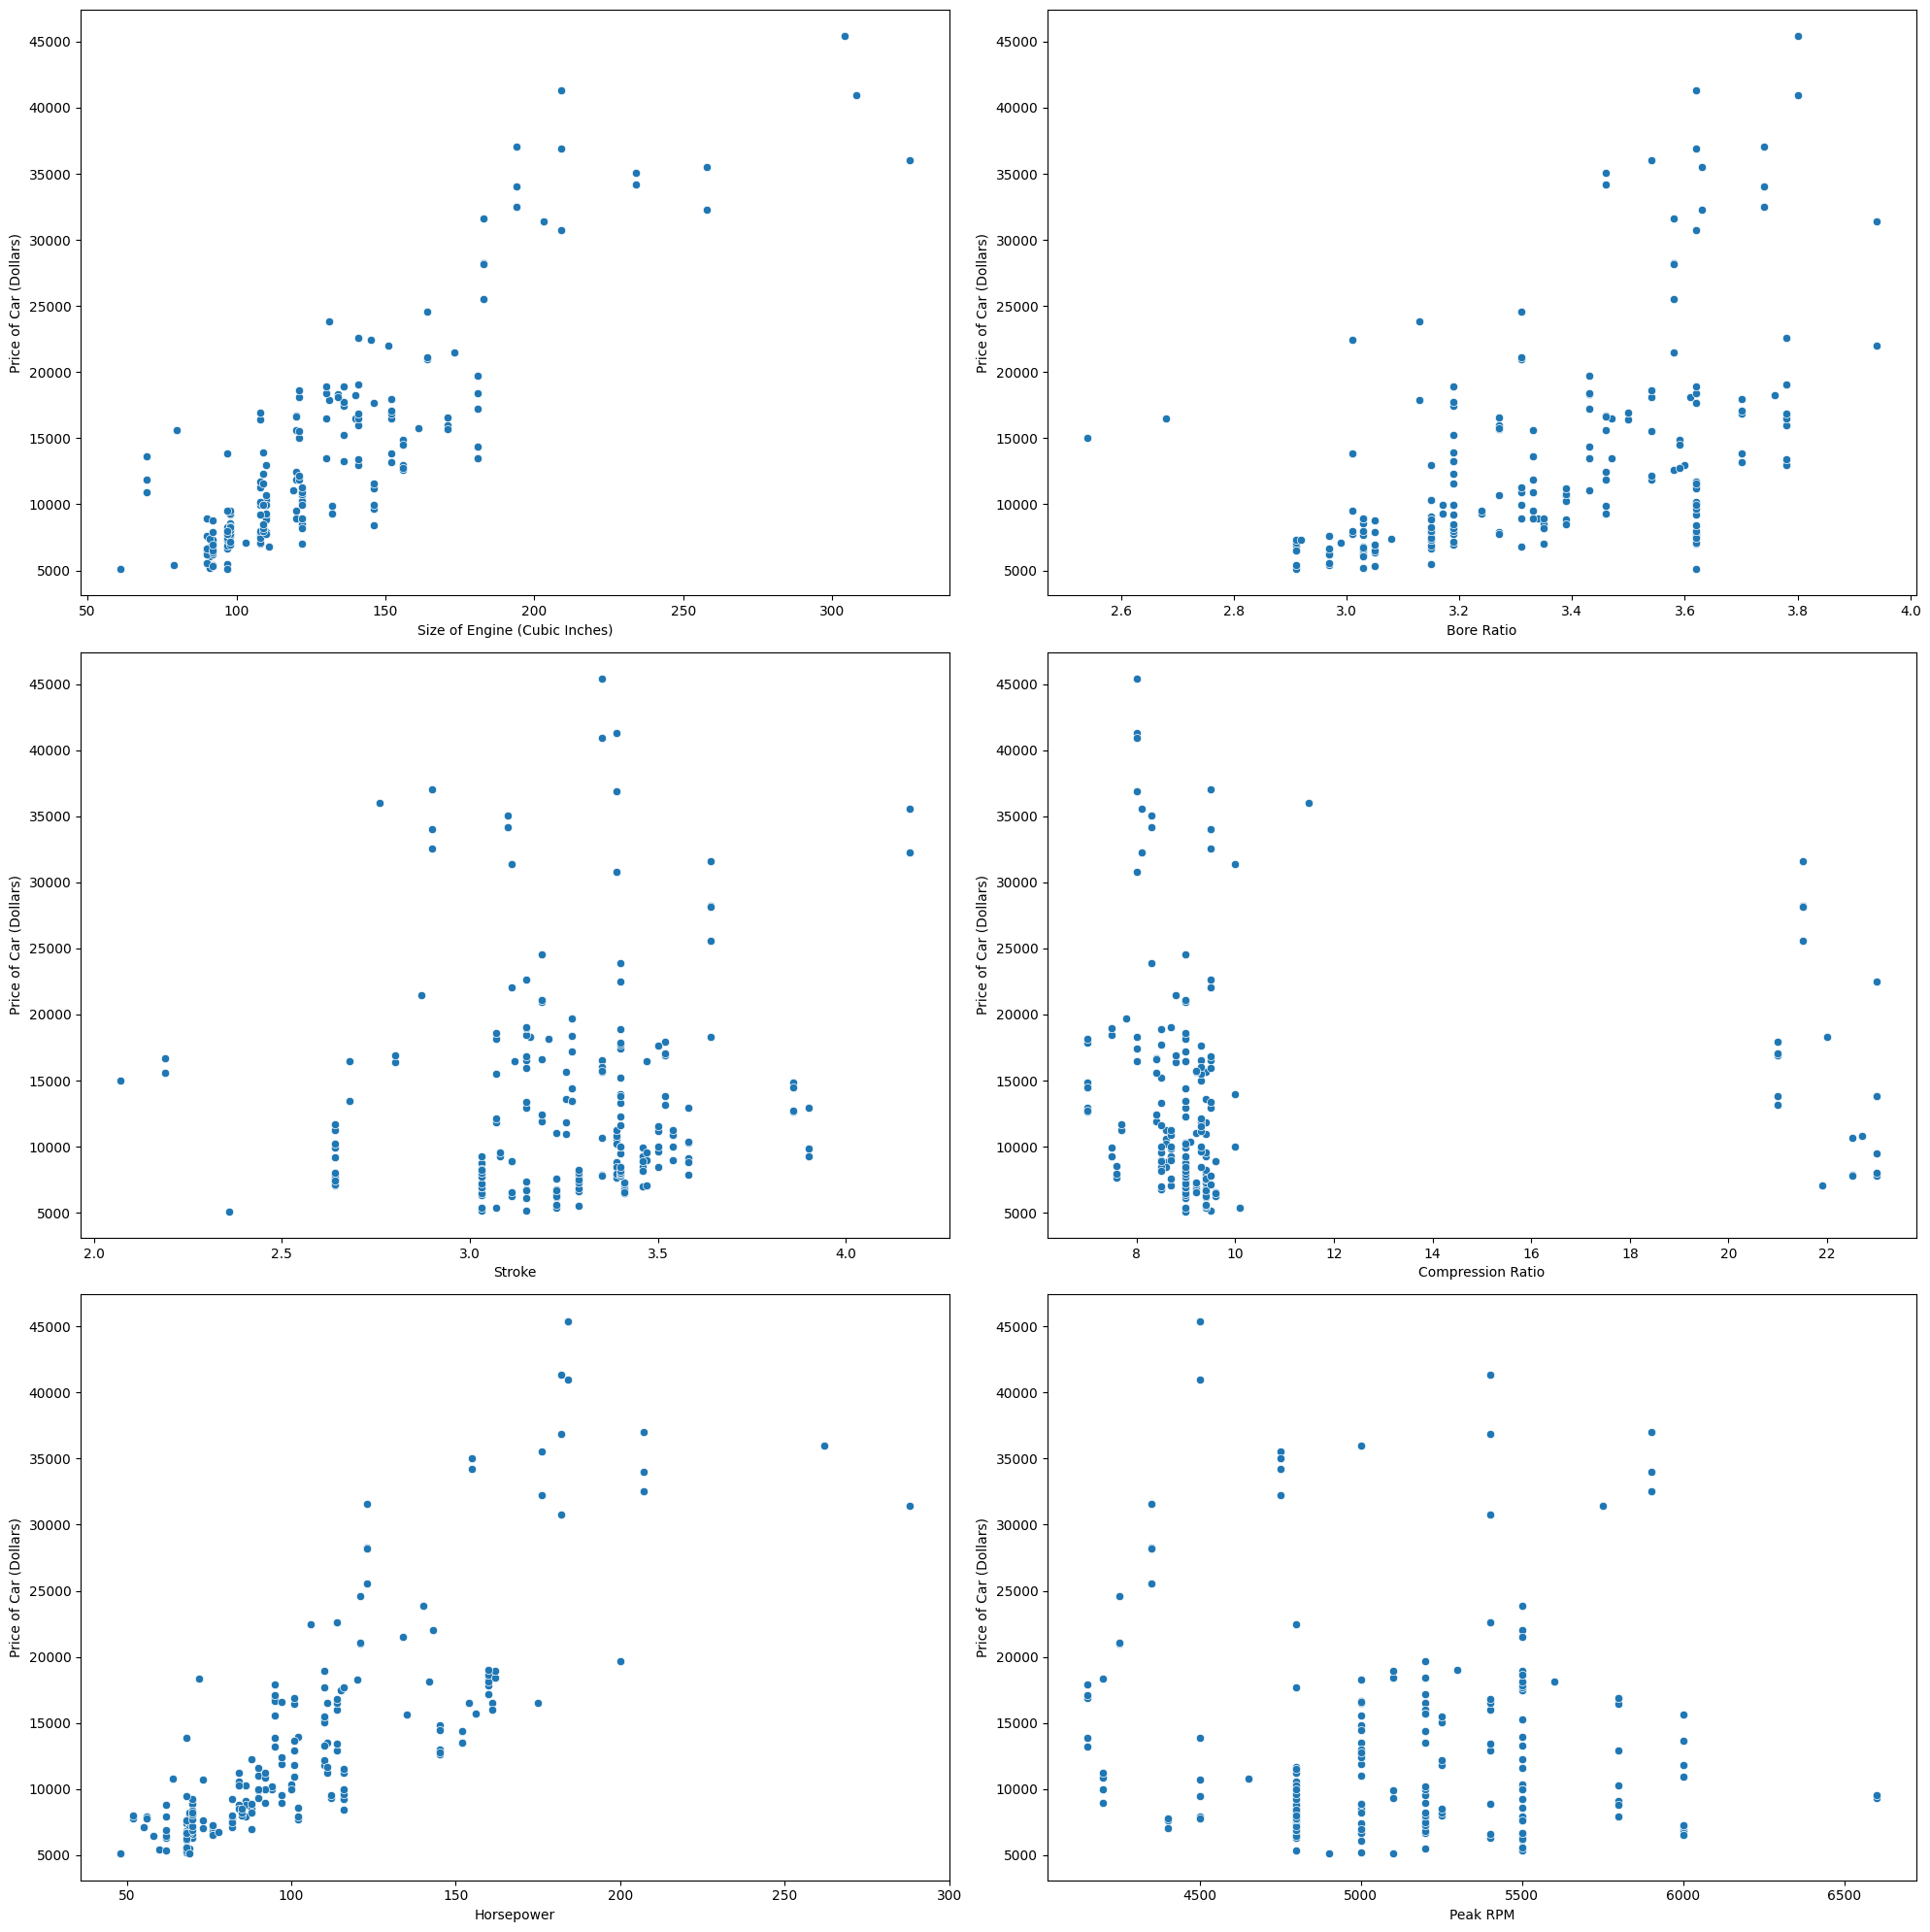

In [51]:
fig, axs = plt.subplots(3,2,figsize=(20,20))
#
plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data = Car, ax = axs[0,0])
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
#
plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data = Car, ax = axs[0,1])
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')
#
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = Car, ax = axs[1,0])
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')
#
plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data = Car, ax = axs[1,1])
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'horsepower', y = 'price', data = Car, ax = axs[2,0])
plt5.set_xlabel('Horsepower')
plt5.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'peakrpm', y = 'price', data = Car, ax = axs[2,1])
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()
plt.show()

### Inference:
Size of Engine, bore ratio, and Horsepower has positive correlation with price.

## City Mileage & Highway Mileage

In [53]:
# A single variable mileage can be calculated taking the weighted average of 55% city and 45% highways.

In [54]:
Car['mileage'] = Car['citympg']*0.55 + Car['highwaympg']*0.45
Car['mileage']

0      23.70
1      23.70
2      22.15
3      26.70
4      19.80
       ...  
200    25.25
201    21.70
202    20.25
203    26.45
204    21.70
Name: mileage, Length: 205, dtype: float64

In [55]:
# Let's see how price varies with mileage.

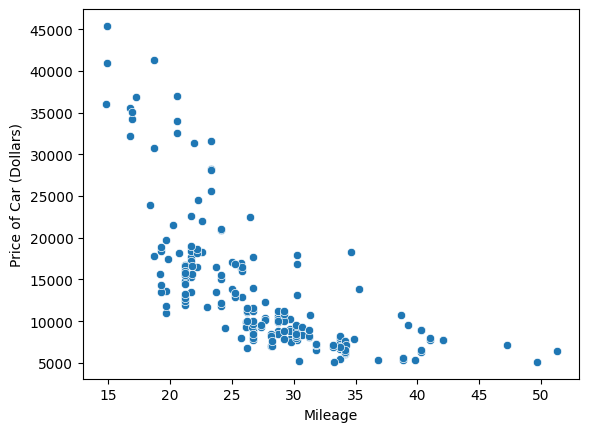

In [56]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', data =Car )
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

### Inference:
Mileage has a negative correlation with price.


### Brand Category - Mileage

In [58]:
# It is expected that luxury brands don't care about mileage. Let's find out how price varies with brand category and mileage.

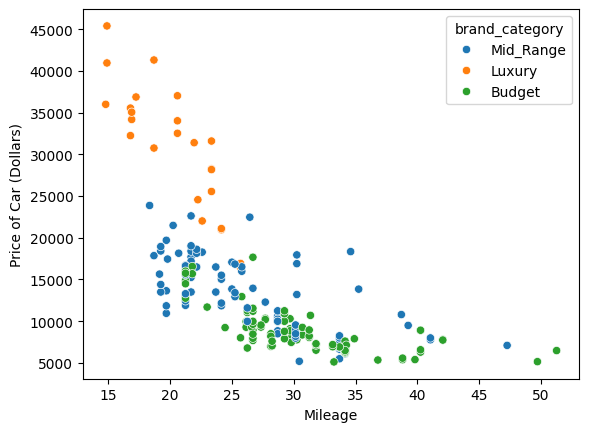

In [59]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data = Car)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

### Brand Category - Horsepower

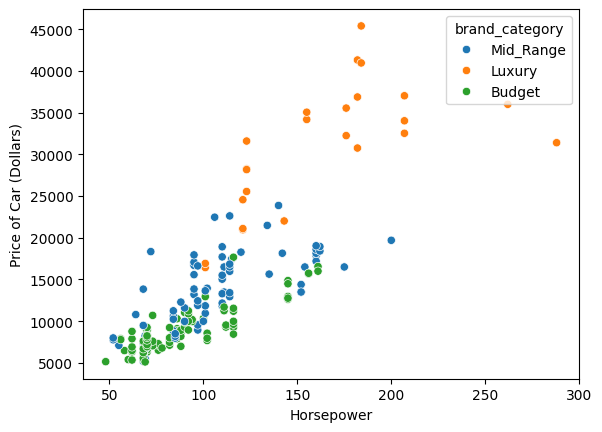

In [60]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = Car)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

### Mileage - Fuel Type

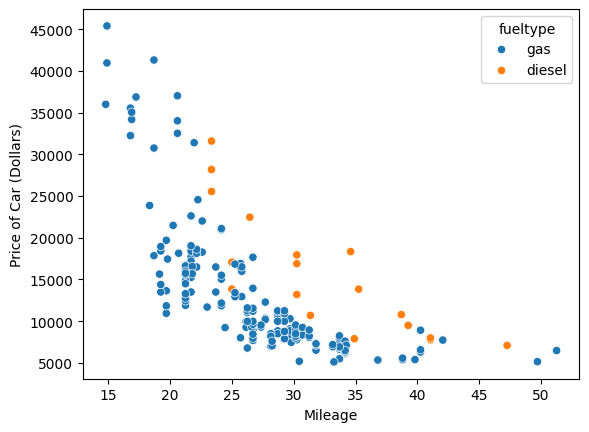

In [61]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fueltype', data = Car)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

### Horsepower - Fuel Type

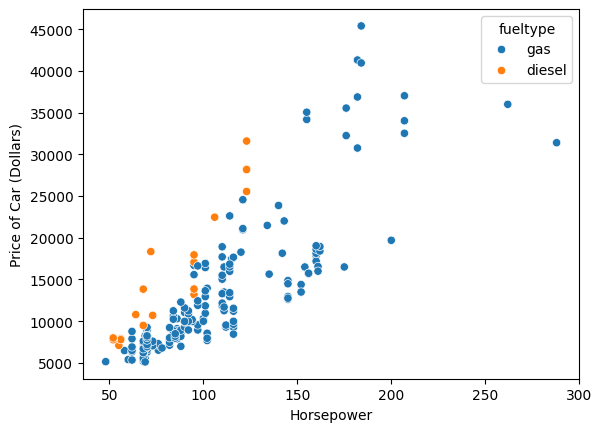

In [62]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = Car)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

## Summary Univariate and Bivriate Analysis:
__From the above Univariate and bivariate analysis we can filter out variables which does not affect price much.__ <br>
__The most important driver variable for prediction of price are:-__
1. Brand Category
2. Fuel Type
3. Aspiration
4. Car Body
5. Drive Wheel
6. Wheelbase
7. Car Length
8. Car Width
9. Curb weight
10. Engine Type
11. Cylinder Number
12. Engine Size
13. Bore Ratio
14. Horsepower
15. Mileage


## Creating new dataframe

In [63]:
auto = Car[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'brand_category', 'mileage']]
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,Mid_Range,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,Mid_Range,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,Mid_Range,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,Mid_Range,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,Mid_Range,19.80


## Visualising the Data

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 1500x1500 with 0 Axes>

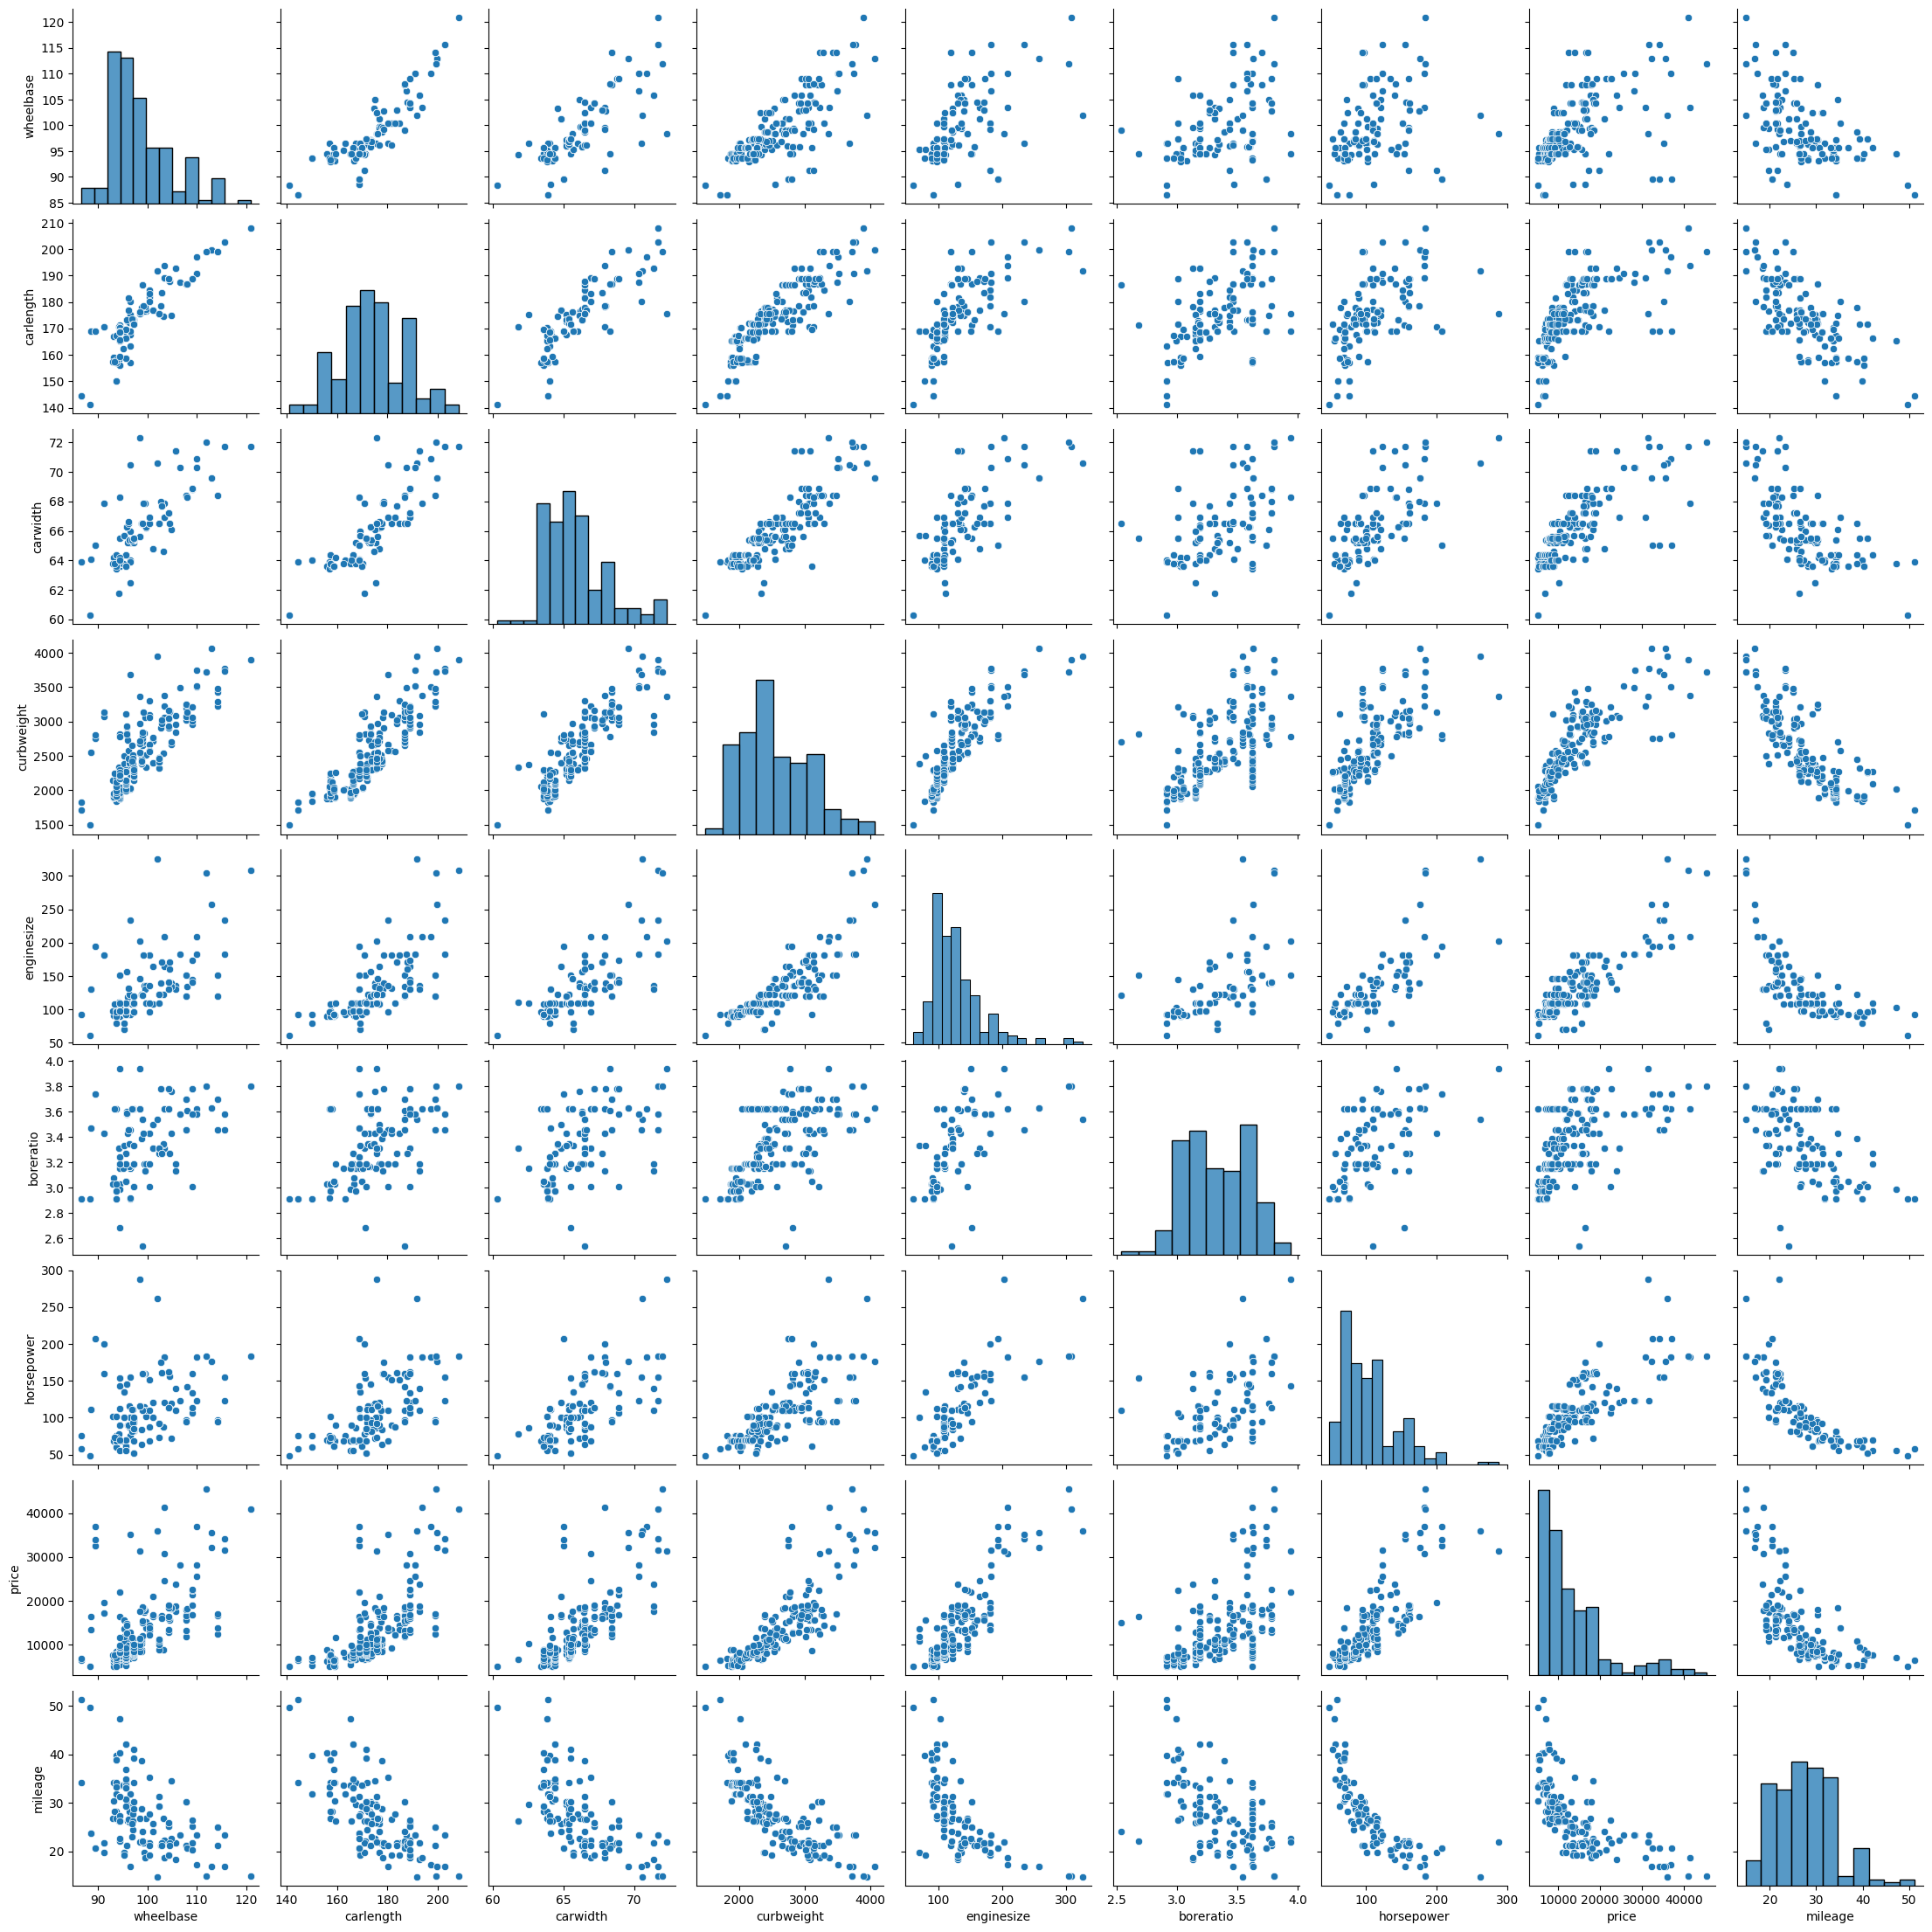

In [64]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()

### Visualising Categorical Variables

Let's make a boxplot for categorical variables.

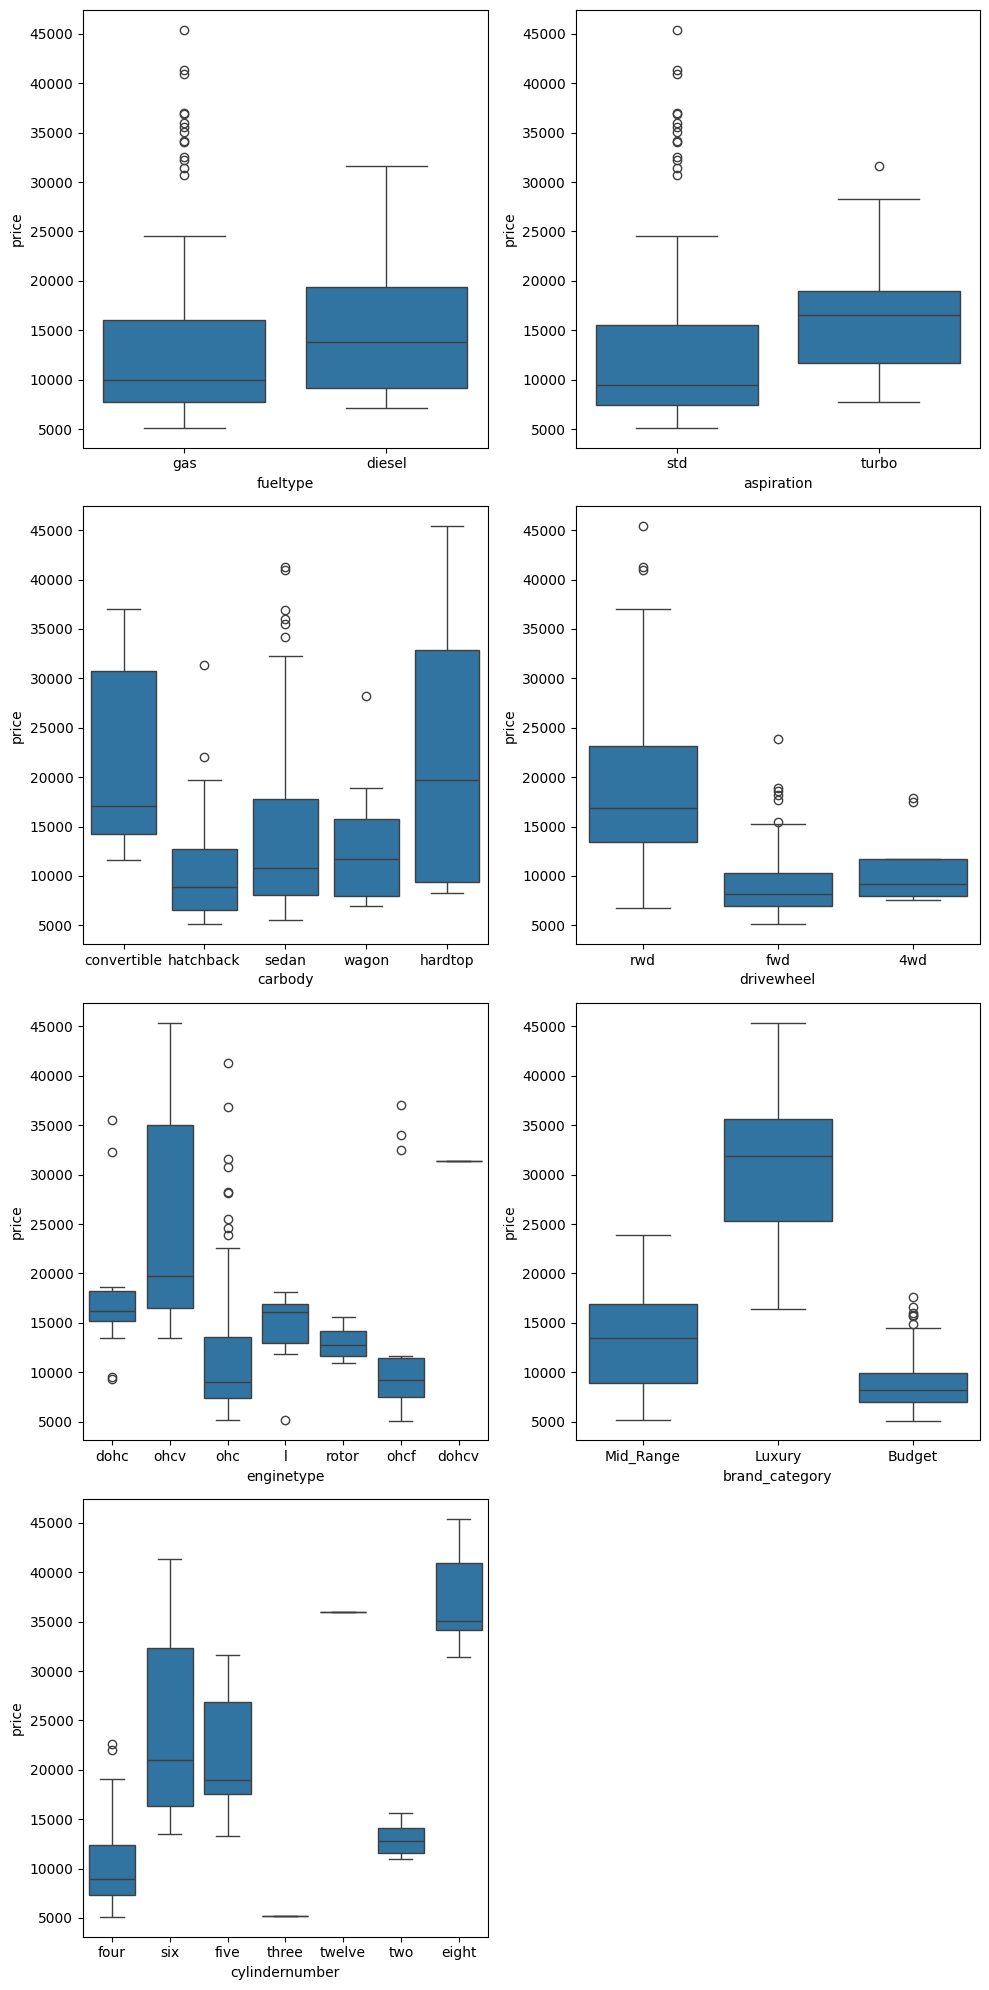

In [65]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = auto)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = auto)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = auto)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = auto)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = auto)
plt.subplot(4,2,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto)
plt.tight_layout()
plt.show()


## Outliers

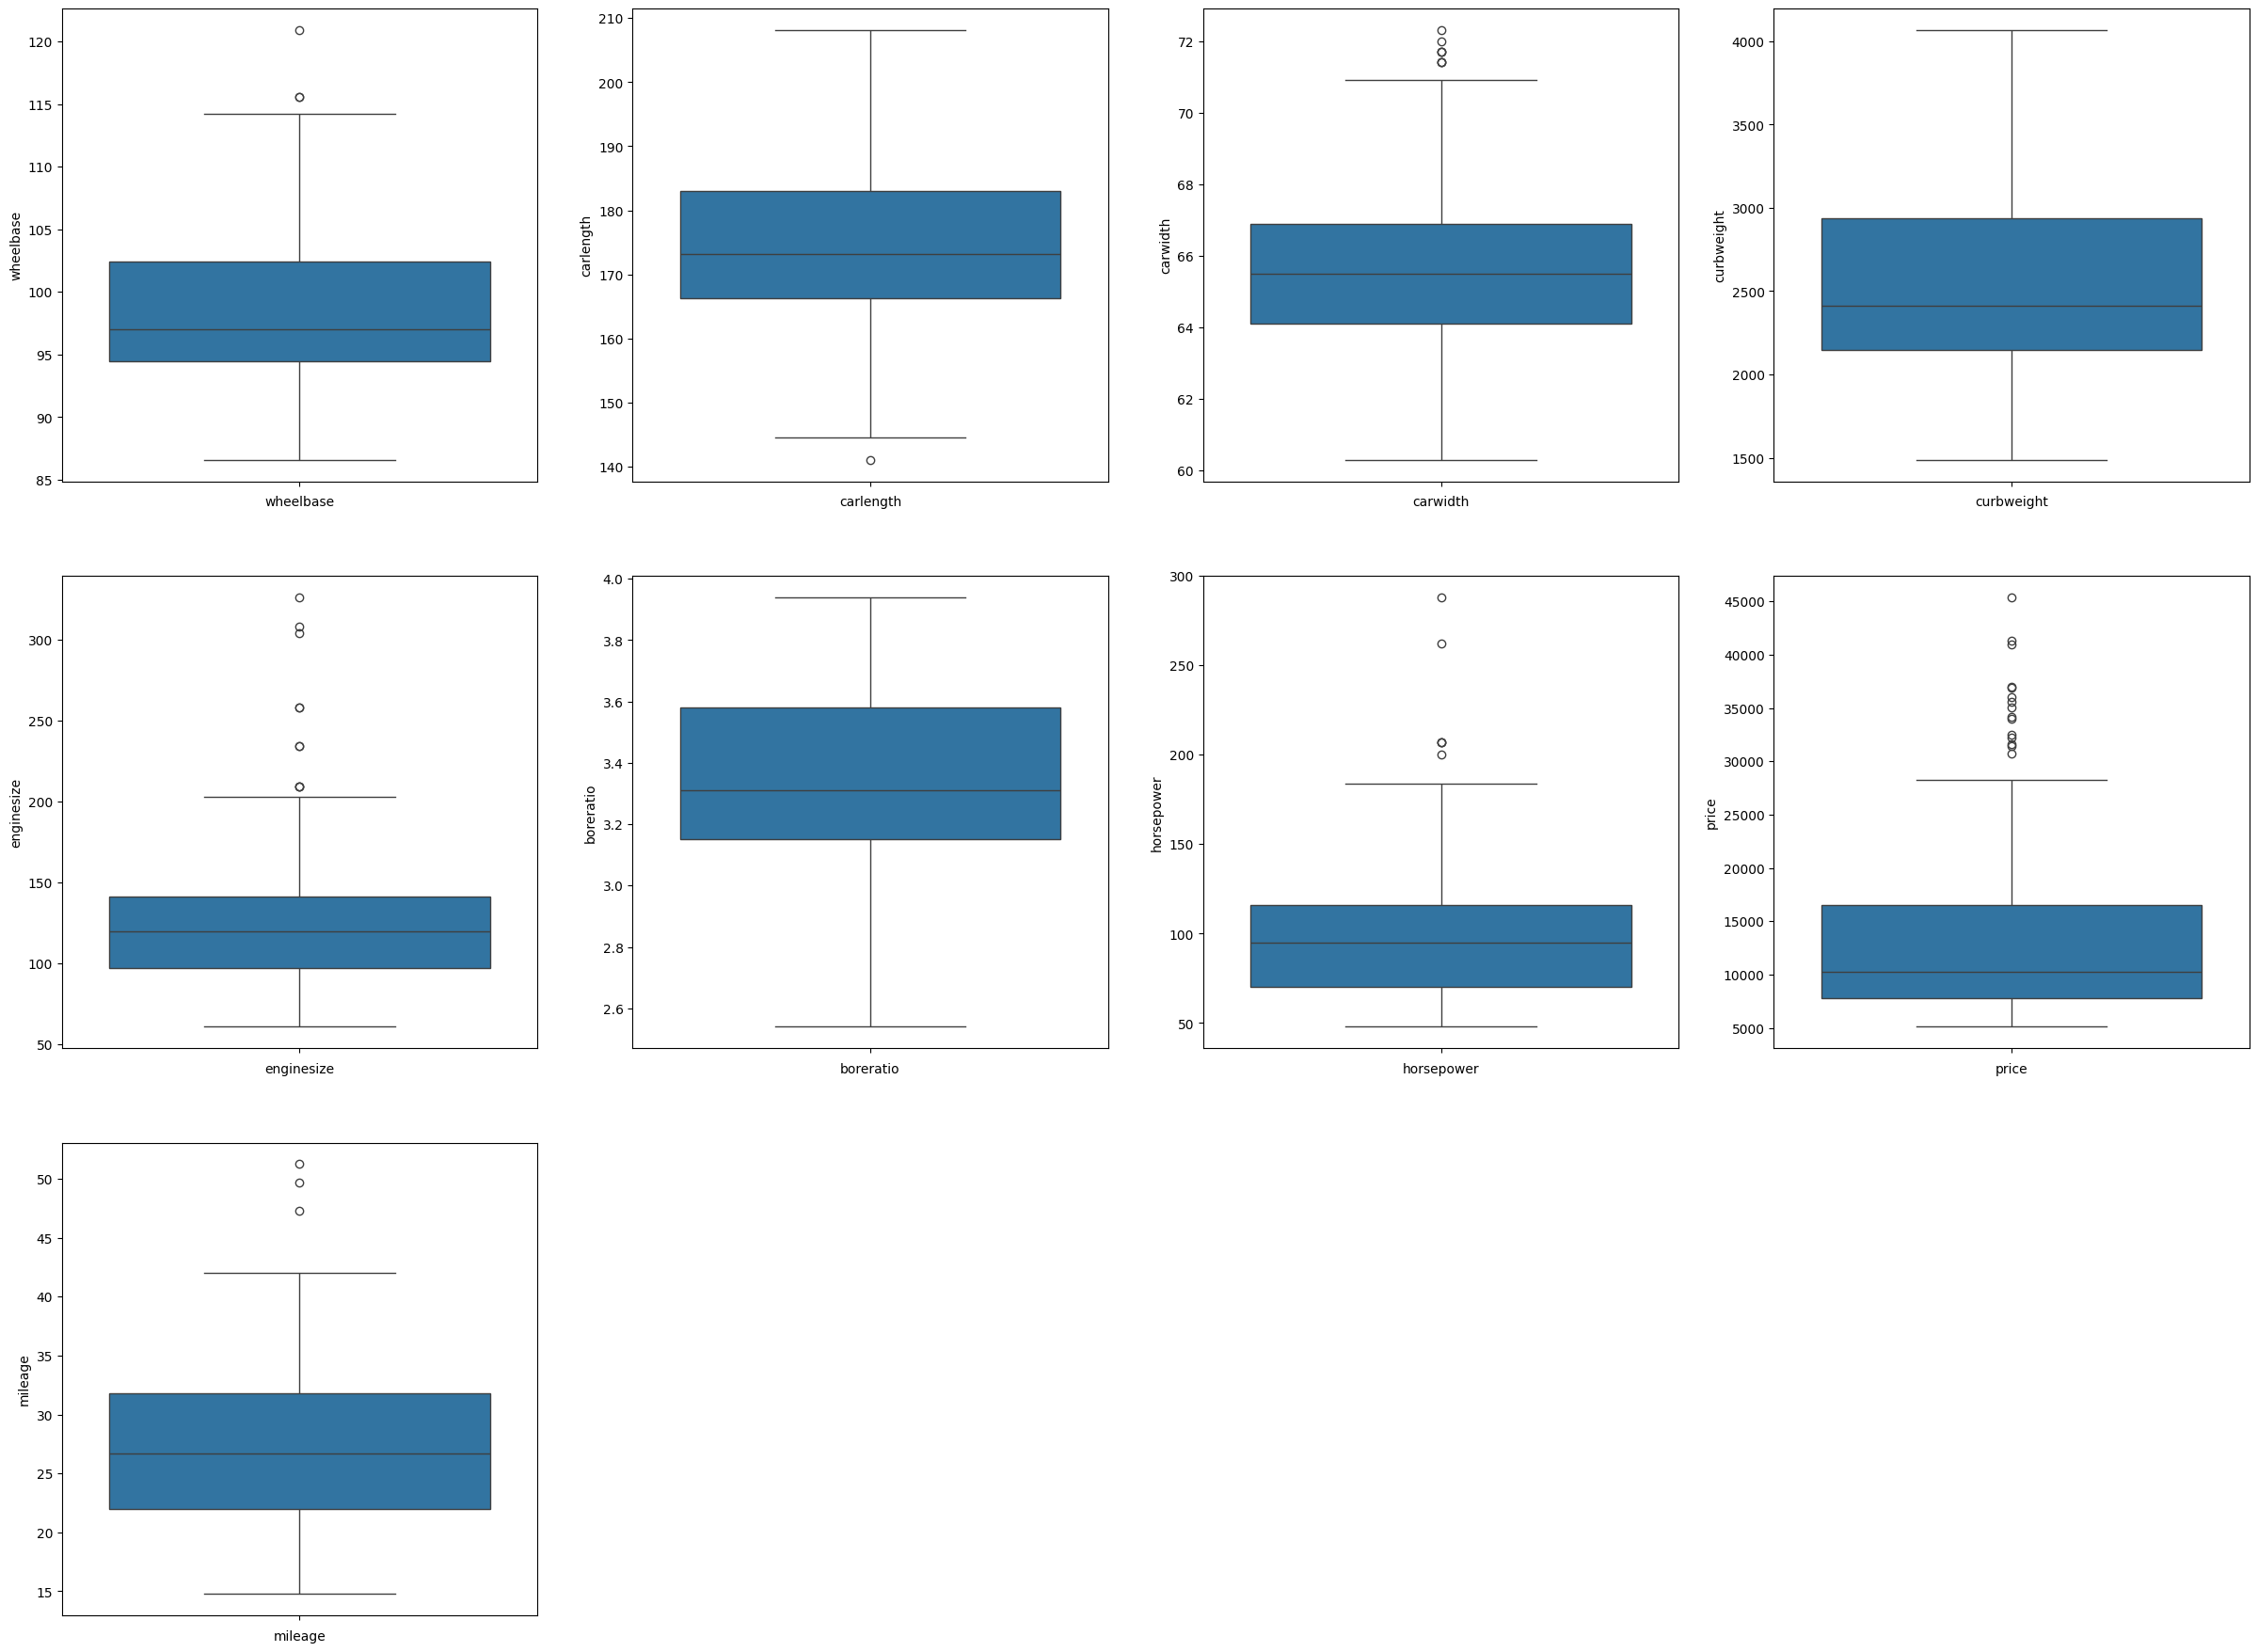

In [66]:
#box plot to identify outliers
fig = plt.figure(figsize=(30,30))
counter = 0

for col in auto.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=auto[col])
    plt.xlabel(col)
    counter = counter + 1

In [67]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [68]:
whisker(auto['curbweight'])

(960.0, 4120.0)

In [69]:
for i in auto.select_dtypes(include="number").columns:
    lw,uw=whisker(auto[i])
    auto[i]=np.where(auto[i]<lw,lw,auto[i])
    auto[i]=np.where(auto[i]>uw,uw,auto[i])    

C:\Users\NOEL STERVIN\AppData\Local\Temp\ipykernel_43860\1741000522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto[i]=np.where(auto[i]<lw,lw,auto[i])
C:\Users\NOEL STERVIN\AppData\Local\Temp\ipykernel_43860\1741000522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto[i]=np.where(auto[i]>uw,uw,auto[i])


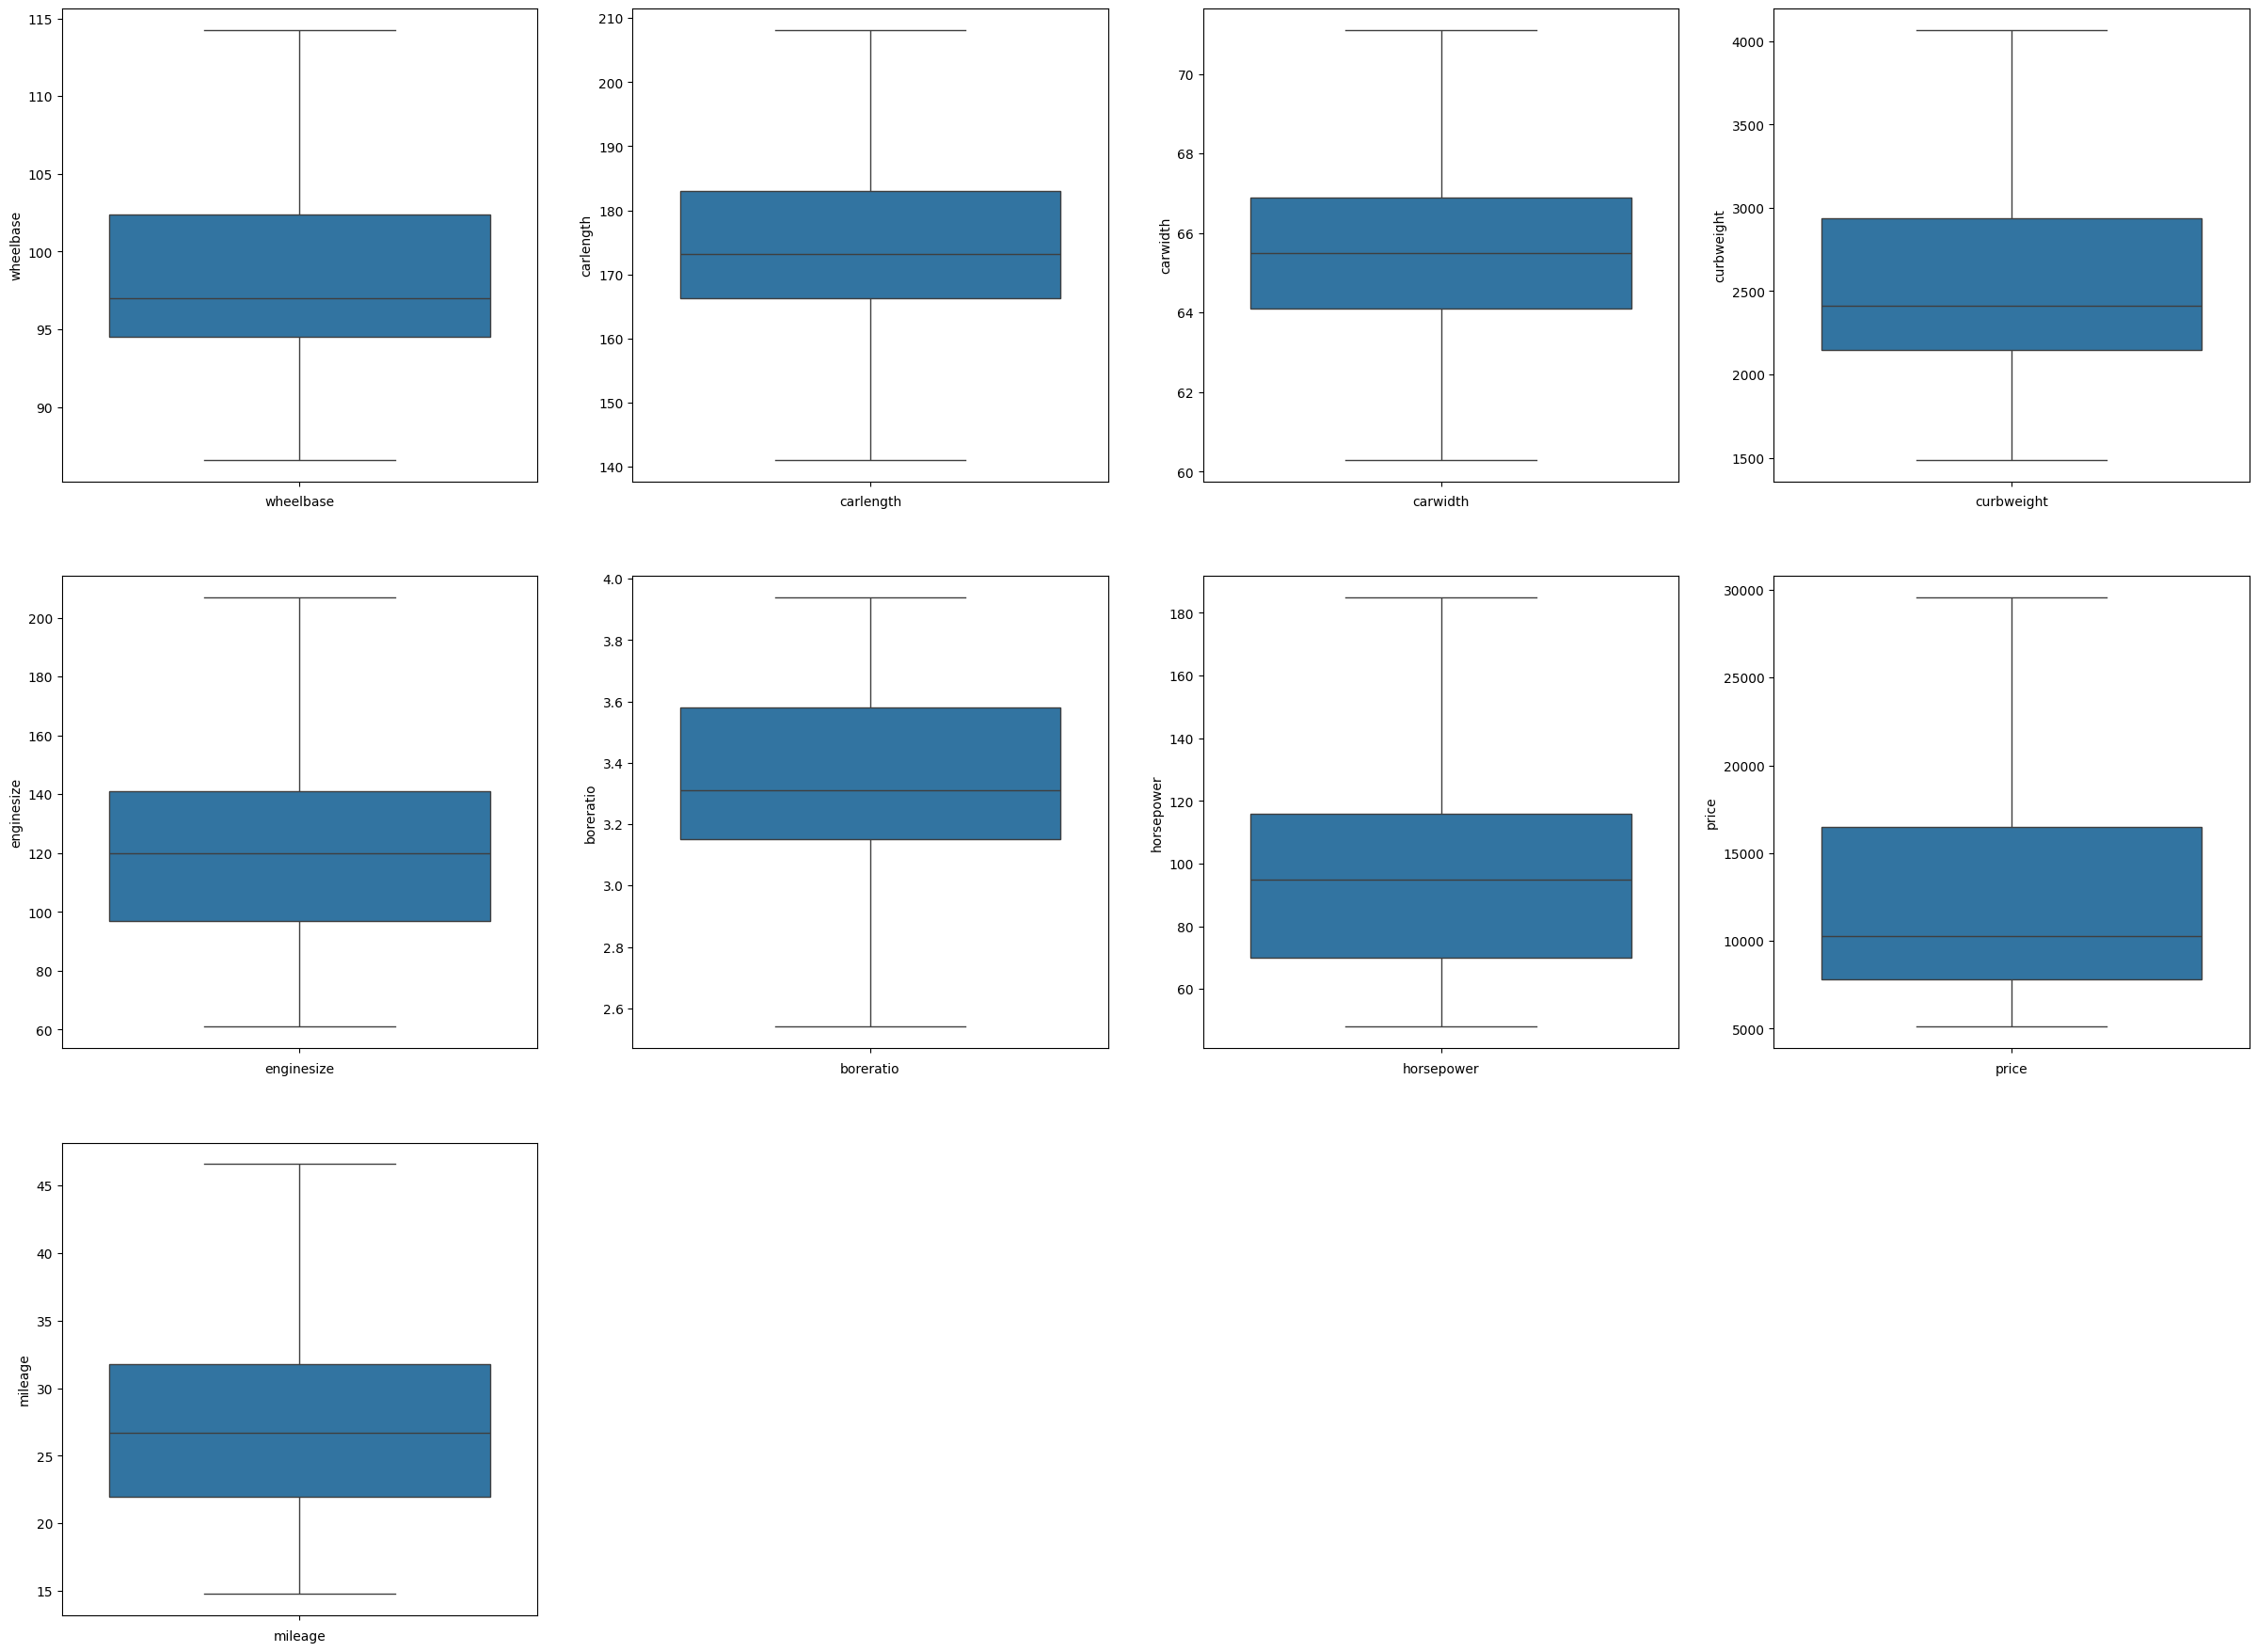

In [70]:
#box plot to identify outliers
fig = plt.figure(figsize=(30,30))
counter = 0

for col in auto.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=auto[col])
    plt.xlabel(col)
    counter = counter + 1

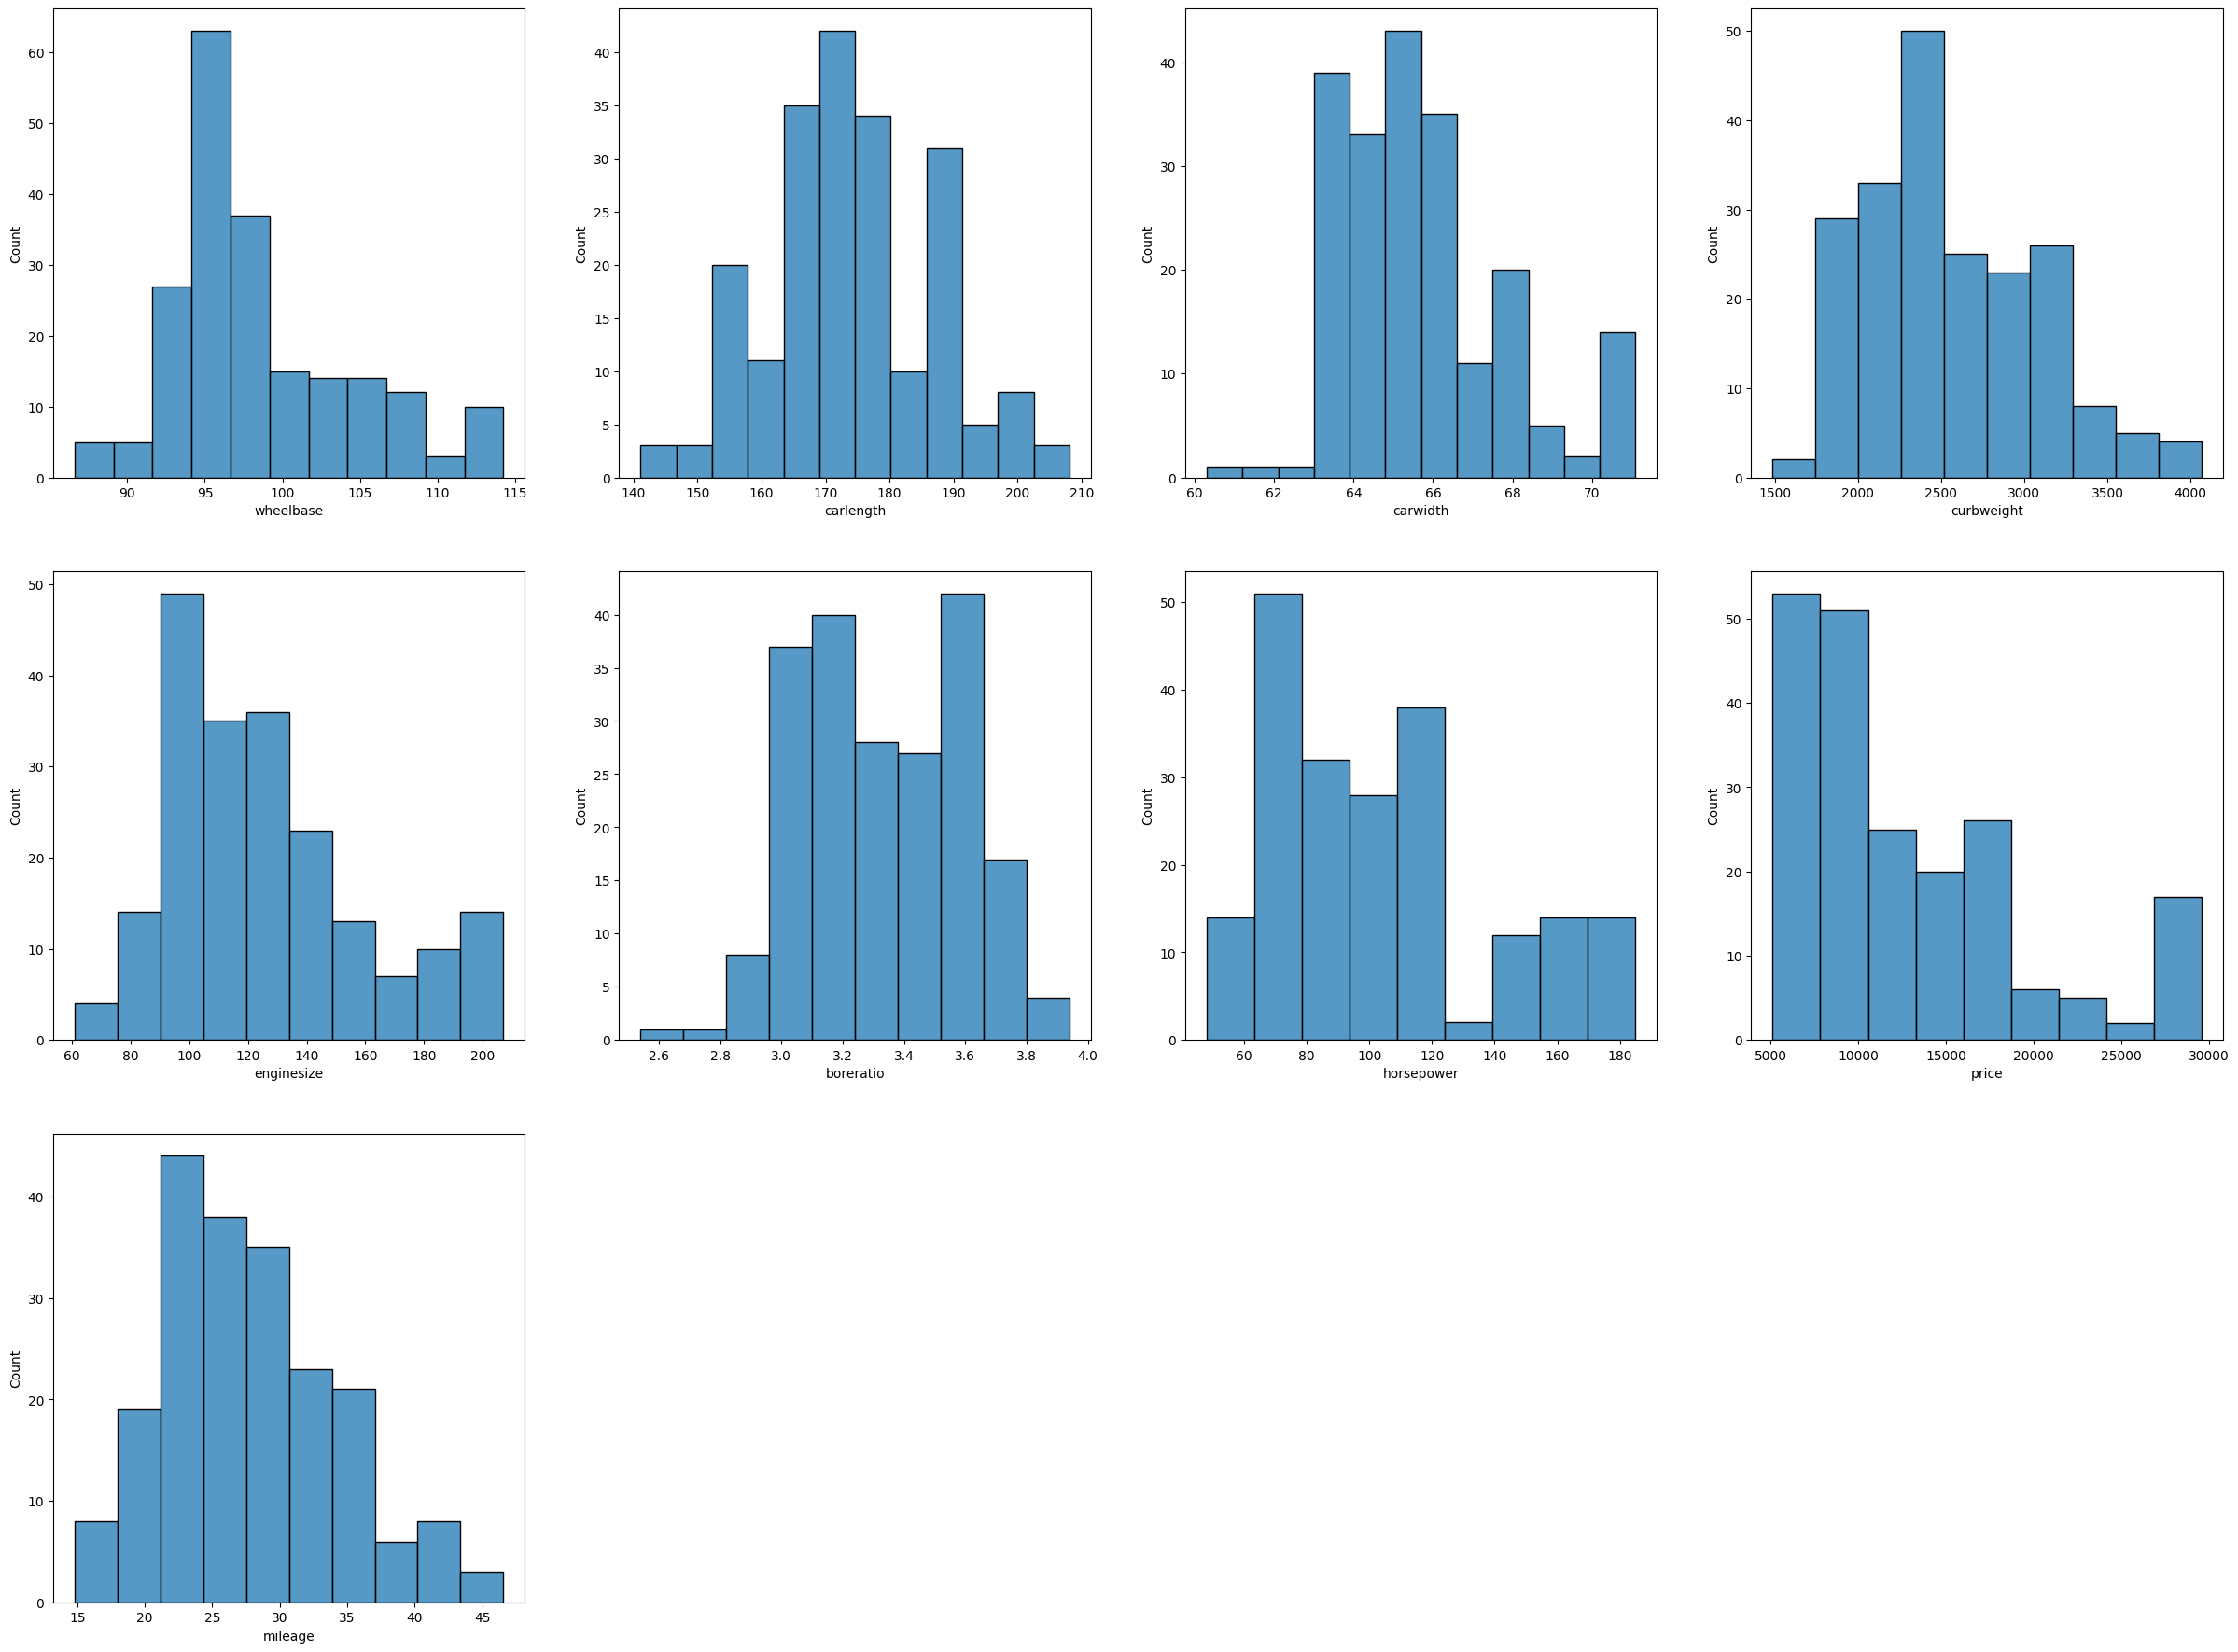

In [88]:
# Distribution of data after outlier treatment
fig = plt.figure(figsize=(30,30))
counter = 0

for col in auto.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.histplot(data=auto[col])
    plt.xlabel(col)
    counter = counter + 1

## Data Preparation

In [72]:
# Categorical Variables are converted into Neumerical Variables with the help of Dummy Variable 

In [73]:
# Create dummy variables for 'cylindernumber' column
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)

# Concatenate the dummy variables with the original DataFrame
auto = pd.concat([auto, cyl_no], axis = 1)

In [74]:
## Creating other dummy variables
brand_cat = pd.get_dummies(auto['brand_category'], drop_first = True)
auto = pd.concat([auto, brand_cat], axis = 1)

eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)
auto = pd.concat([auto, eng_typ], axis = 1)

drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)
auto = pd.concat([auto, drwh], axis = 1)

carb = pd.get_dummies(auto['carbody'], drop_first = True)
auto = pd.concat([auto,carb], axis=1)

asp = pd.get_dummies(auto['aspiration'], drop_first = True)
auto = pd.concat([auto,asp], axis=1)

fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)
auto = pd.concat([auto, fuelt], axis = 1)

# Drop the original  columns as it's no longer needed
auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','brand_category'], axis = 1, inplace = True)

In [75]:
auto

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,13495.0,23.70,False,...,False,False,False,True,False,False,False,False,False,True
1,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,16500.0,23.70,False,...,False,False,False,True,False,False,False,False,False,True
2,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,16500.0,22.15,False,...,True,False,False,True,False,True,False,False,False,True
3,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,13950.0,26.70,False,...,False,False,True,False,False,False,True,False,False,True
4,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,17450.0,19.80,True,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952.0,141.0,3.78,114.0,16845.0,25.25,False,...,False,False,False,True,False,False,True,False,False,True
201,109.1,188.8,68.8,3049.0,141.0,3.78,160.0,19045.0,21.70,False,...,False,False,False,True,False,False,True,False,True,True
202,109.1,188.8,68.9,3012.0,173.0,3.58,134.0,21485.0,20.25,False,...,True,False,False,True,False,False,True,False,False,True
203,109.1,188.8,68.9,3217.0,145.0,3.01,106.0,22470.0,26.45,False,...,False,False,False,True,False,False,True,False,True,False


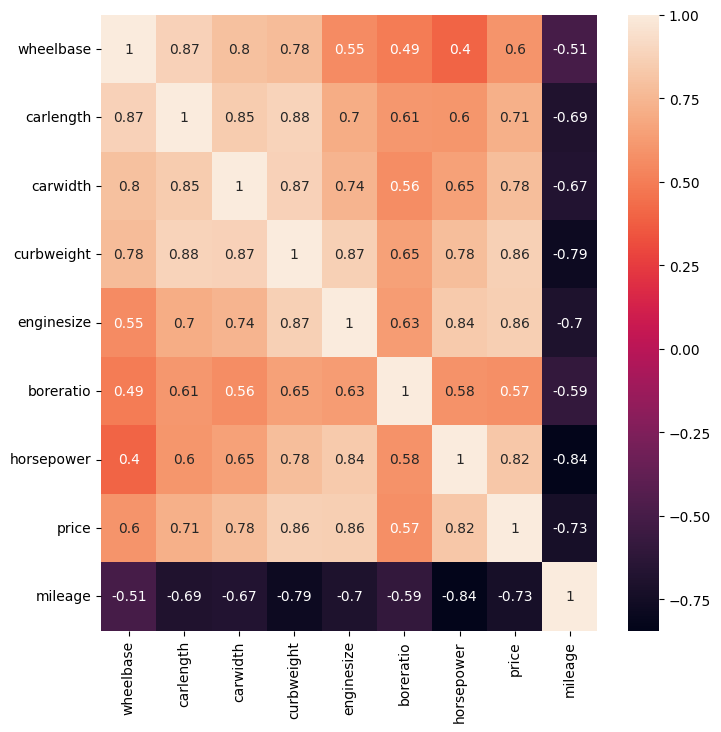

In [96]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (8,8))
sns.heatmap(auto.select_dtypes(include="number").corr(), annot = True)
plt.show()

#### A heatmap visualizes the correlation matrix, making it easier to identify patterns and relationships between variables. 
In a heatmap, brighter colors (closer to 1 or -1) indicate stronger correlations, while darker colors (closer to 0) indicate weaker correlations.

#### Highly correlated columns (where correlation>0.85) (
curbweight,enginesi), (e
curbweight,carlen), (th
curbweight,carw),
(dth
wheelbase,carl).
ength

<Axes: xlabel='wheelbase', ylabel='carlength'>

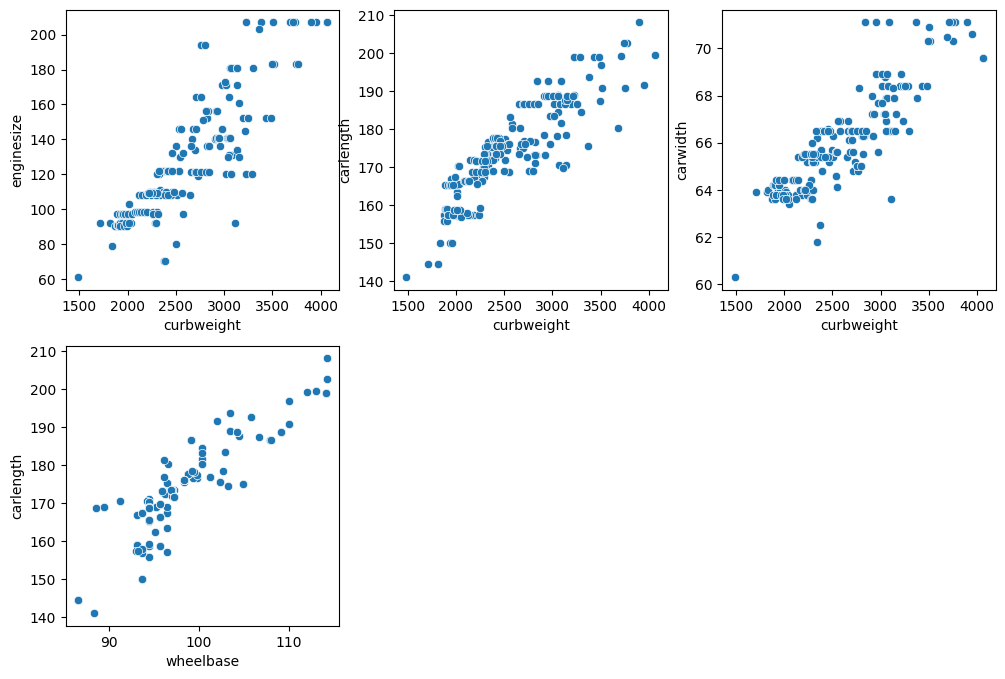

In [77]:
plt.figure(figsize=(12, 8))


plt.subplot(2,3,1)
sns.scatterplot(data=auto,x='curbweight',y='enginesize')

plt.subplot(2,3,2)
sns.scatterplot(data=auto,x='curbweight',y='carlength')

plt.subplot(2,3,3)
sns.scatterplot(data=auto,x='curbweight',y='carwidth')

plt.subplot(2,3,4)
sns.scatterplot(data=auto,x='wheelbase',y='carlength')

We can drop 'curbweight','wheelbase'

In [78]:
auto1=auto.copy()
auto1

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,13495.0,23.70,False,...,False,False,False,True,False,False,False,False,False,True
1,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,16500.0,23.70,False,...,False,False,False,True,False,False,False,False,False,True
2,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,16500.0,22.15,False,...,True,False,False,True,False,True,False,False,False,True
3,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,13950.0,26.70,False,...,False,False,True,False,False,False,True,False,False,True
4,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,17450.0,19.80,True,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952.0,141.0,3.78,114.0,16845.0,25.25,False,...,False,False,False,True,False,False,True,False,False,True
201,109.1,188.8,68.8,3049.0,141.0,3.78,160.0,19045.0,21.70,False,...,False,False,False,True,False,False,True,False,True,True
202,109.1,188.8,68.9,3012.0,173.0,3.58,134.0,21485.0,20.25,False,...,True,False,False,True,False,False,True,False,False,True
203,109.1,188.8,68.9,3217.0,145.0,3.01,106.0,22470.0,26.45,False,...,False,False,False,True,False,False,True,False,True,False


In [79]:
auto1.drop(['curbweight','wheelbase'],axis =1, inplace = True)
auto1

,carlength,carwidth,enginesize,boreratio,horsepower,price,mileage,five,four,six,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,168.8,64.1,130.0,3.47,111.0,13495.0,23.70,False,True,False,...,False,False,False,True,False,False,False,False,False,True
1,168.8,64.1,130.0,3.47,111.0,16500.0,23.70,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,171.2,65.5,152.0,2.68,154.0,16500.0,22.15,False,False,True,...,True,False,False,True,False,True,False,False,False,True
3,176.6,66.2,109.0,3.19,102.0,13950.0,26.70,False,True,False,...,False,False,True,False,False,False,True,False,False,True
4,176.6,66.4,136.0,3.19,115.0,17450.0,19.80,True,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,141.0,3.78,114.0,16845.0,25.25,False,True,False,...,False,False,False,True,False,False,True,False,False,True
201,188.8,68.8,141.0,3.78,160.0,19045.0,21.70,False,True,False,...,False,False,False,True,False,False,True,False,True,True
202,188.8,68.9,173.0,3.58,134.0,21485.0,20.25,False,False,True,...,True,False,False,True,False,False,True,False,False,True
203,188.8,68.9,145.0,3.01,106.0,22470.0,26.45,False,False,True,...,False,False,False,True,False,False,True,False,True,False


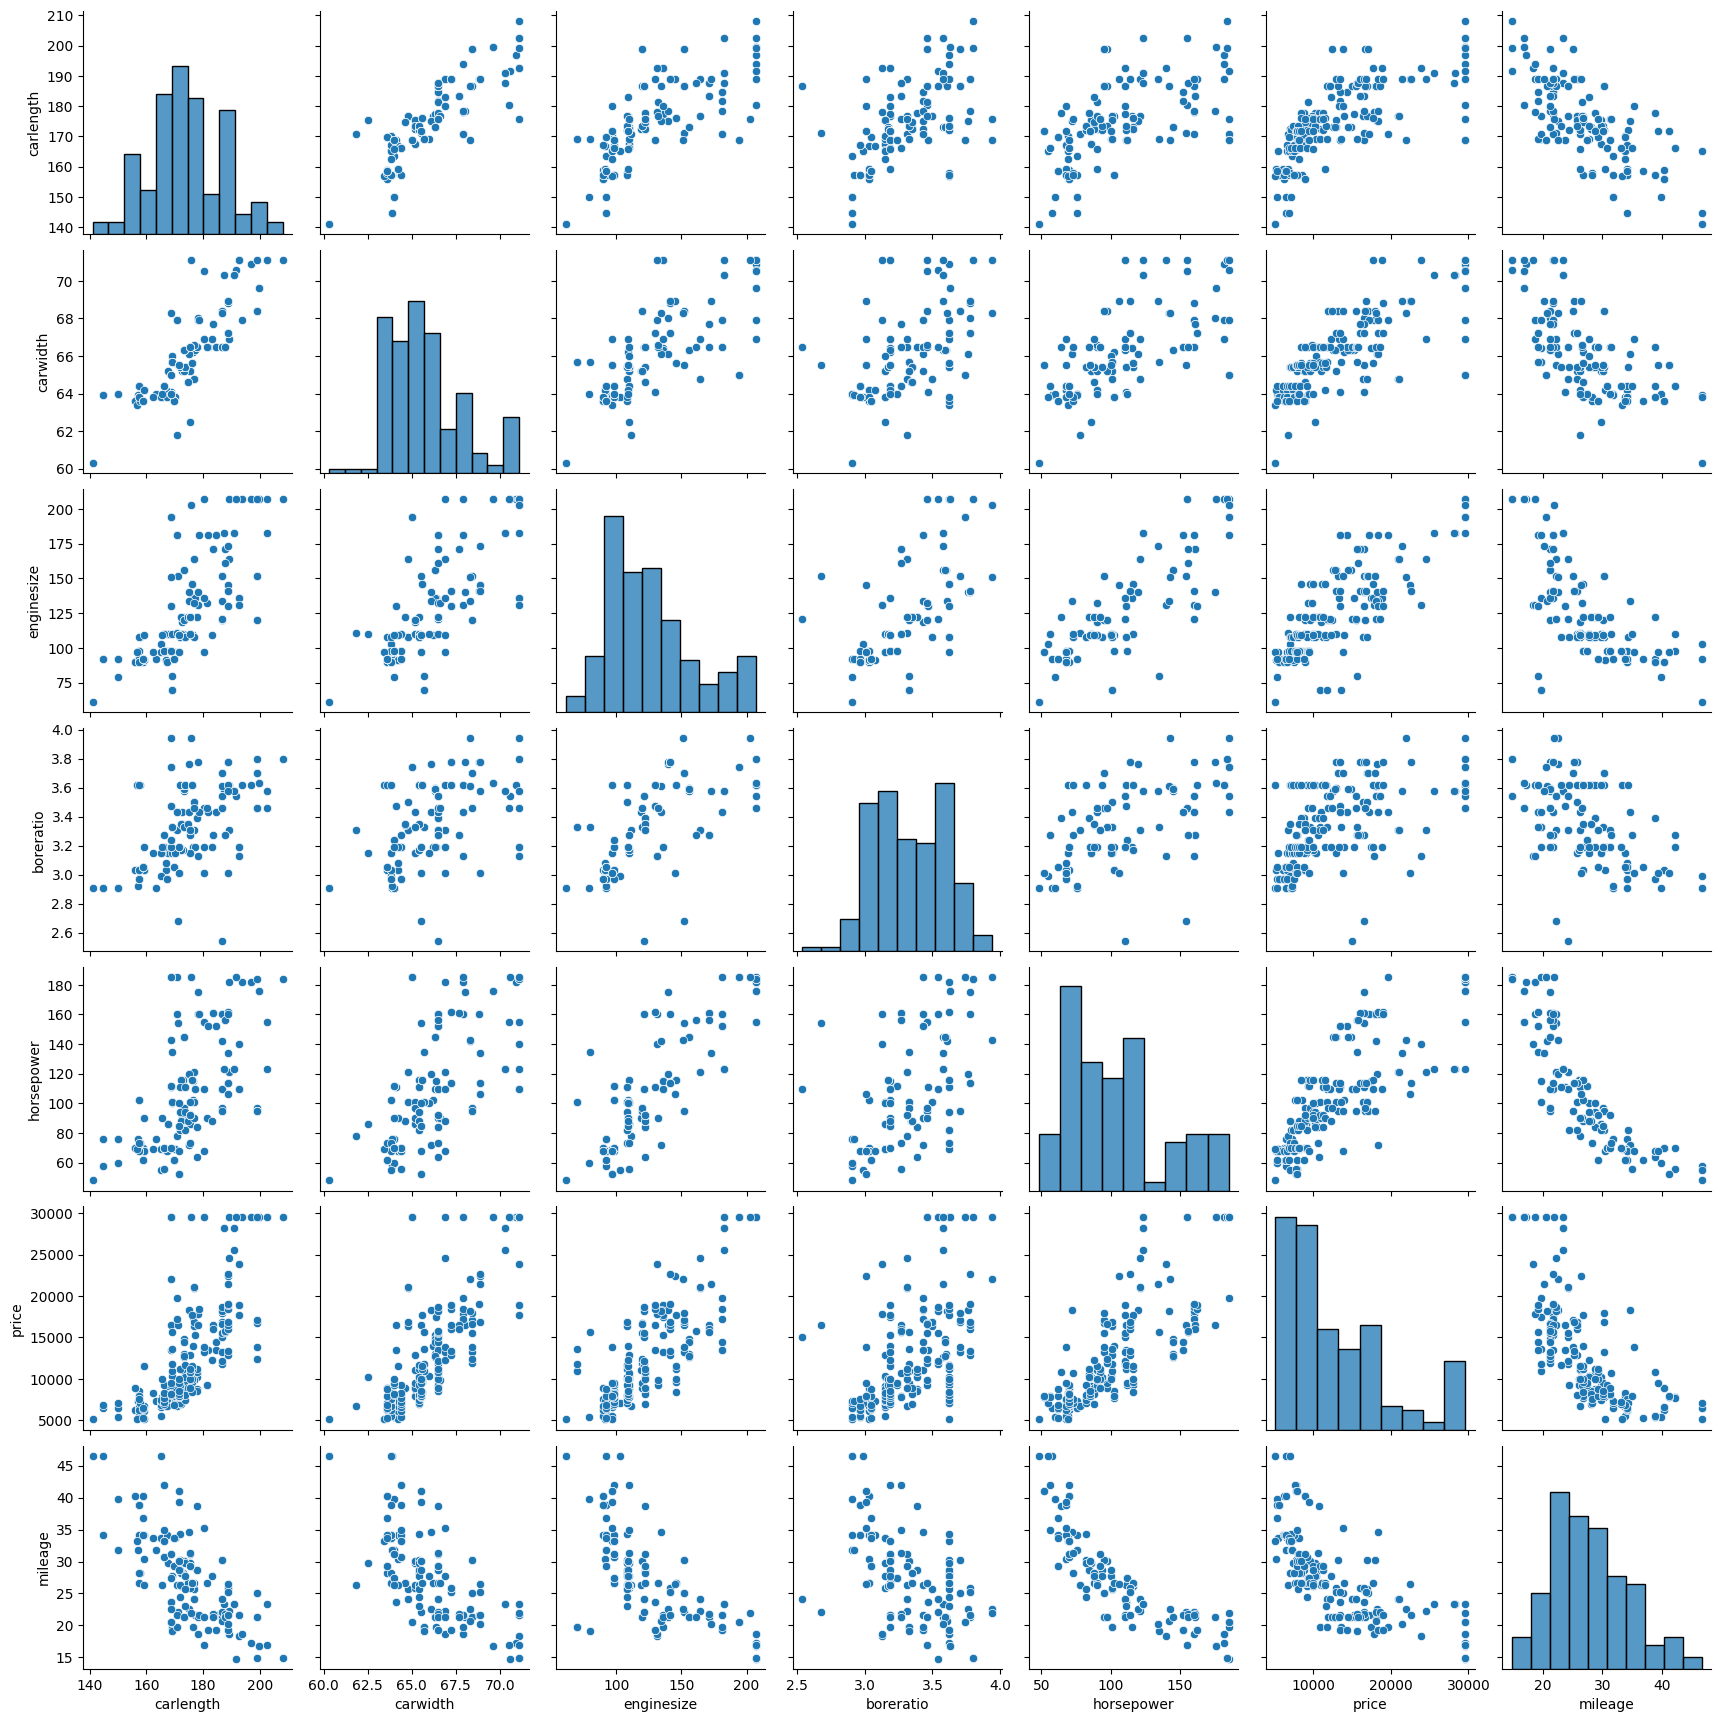

In [80]:
#pairwise scatter plot and observe linear relationships.
    
# Select only numerical variables
numerical_vars = auto1.select_dtypes(include=['int64', 'float64'])

# Plot pair plot
sns.pairplot(numerical_vars)
plt.show()

## Building Regression Models Using Linear Regressor, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor and SVM Regressor:

In [81]:
auto

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,13495.0,23.70,False,...,False,False,False,True,False,False,False,False,False,True
1,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,16500.0,23.70,False,...,False,False,False,True,False,False,False,False,False,True
2,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,16500.0,22.15,False,...,True,False,False,True,False,True,False,False,False,True
3,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,13950.0,26.70,False,...,False,False,True,False,False,False,True,False,False,True
4,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,17450.0,19.80,True,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952.0,141.0,3.78,114.0,16845.0,25.25,False,...,False,False,False,True,False,False,True,False,False,True
201,109.1,188.8,68.8,3049.0,141.0,3.78,160.0,19045.0,21.70,False,...,False,False,False,True,False,False,True,False,True,True
202,109.1,188.8,68.9,3012.0,173.0,3.58,134.0,21485.0,20.25,False,...,True,False,False,True,False,False,True,False,False,True
203,109.1,188.8,68.9,3217.0,145.0,3.01,106.0,22470.0,26.45,False,...,False,False,False,True,False,False,True,False,True,False


In [82]:
X=auto1.drop('price',axis=1)
y=auto1[['price']]

In [83]:
X

,carlength,carwidth,enginesize,boreratio,horsepower,mileage,five,four,six,three,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,168.8,64.1,130.0,3.47,111.0,23.70,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
1,168.8,64.1,130.0,3.47,111.0,23.70,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,171.2,65.5,152.0,2.68,154.0,22.15,False,False,True,False,...,True,False,False,True,False,True,False,False,False,True
3,176.6,66.2,109.0,3.19,102.0,26.70,False,True,False,False,...,False,False,True,False,False,False,True,False,False,True
4,176.6,66.4,136.0,3.19,115.0,19.80,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,141.0,3.78,114.0,25.25,False,True,False,False,...,False,False,False,True,False,False,True,False,False,True
201,188.8,68.8,141.0,3.78,160.0,21.70,False,True,False,False,...,False,False,False,True,False,False,True,False,True,True
202,188.8,68.9,173.0,3.58,134.0,20.25,False,False,True,False,...,True,False,False,True,False,False,True,False,False,True
203,188.8,68.9,145.0,3.01,106.0,26.45,False,False,True,False,...,False,False,False,True,False,False,True,False,True,False


In [84]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [85]:
### Rescaling the Features using  min-max scaling

In [86]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Convert the result back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
X_scaled

In [ ]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 1) Linear Regression Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
LinearModel=LinearRegression()

In [ ]:
#training the model with the provided training data
LinearModel.fit(x_train,y_train)

In [ ]:
Linear_PredictedTest=LinearModel.predict(x_test)
Linear_PredictedTest

In [ ]:
# Plot the actual target variable against the predicted values
plt.scatter(y_test, Linear_PredictedTest, color='blue', label='Actual')
plt.plot(y_test, y_test, color='red', label='Prediction')  # Plot the perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Predictions vs Actual Prices')
plt.legend()
plt.show()

Evaluation of Linear Regression Model

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("Linear Regression:")
mae=mean_absolute_error(y_test,Linear_PredictedTest)
mse=mean_squared_error(y_test,Linear_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test,Linear_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

In [ ]:
# lr.score(x_test, y_test) calculates the R-squared score on the test data .
LinearModel.score(x_test,y_test)

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LinearModel,x_train,y_train,cv=5)
scores

In [ ]:
scores.mean()

### 2) Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#creating object for DecisionTree Regression class
DecisionTree = DecisionTreeRegressor(random_state=42)

In [ ]:
#training the model with the provided training data
DecisionTree.fit(x_train, y_train)

In [ ]:
Decision_PredictedTest=DecisionTree.predict(x_test)
Decision_PredictedTest

Evaluation of Decision Tree Algorithm

In [ ]:
print("Decision Tree Regressor:")
mae=mean_absolute_error(y_test, Decision_PredictedTest)
mse=mean_squared_error(y_test, Decision_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Decision_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

In [ ]:
DecisionTree.score(x_test,y_test)

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(DecisionTree,x_train,y_train,cv=5)
scores

In [ ]:
scores.mean()

### 3) Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(x_train, y_train)

In [ ]:
Random_PredictedTest=random_forest.predict(x_test)
Random_PredictedTest

Evaluation of Random Forest

In [ ]:
print("Random Forest:")
mae=mean_absolute_error(y_test, Random_PredictedTest)
mse=mean_squared_error(y_test, Random_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Random_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

In [ ]:
random_forest.score(x_test,y_test)

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(DecisionTree,x_train,y_train,cv=5)
scores

In [ ]:
scores.mean()

### 4) Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(x_train, y_train)

In [ ]:
svr_PredictedTest = svr_model.predict(x_test)
svr_PredictedTest

Evaluation of Support Vector Regressor Algorithm

In [ ]:
print("Support Vector Machine(SVM):")
mae=mean_absolute_error(y_test, svr_PredictedTest)
mse=mean_squared_error(y_test, svr_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test,svr_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

In [ ]:
svr_model.score(x_test,y_test)

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svr_model,x_train,y_train,cv=5)
scores

In [ ]:
scores.mean()

### 5) Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GradientBoosting = GradientBoostingRegressor(random_state=42)
GradientBoosting.fit(x_train, y_train)

In [ ]:
Gradient_PredictedTest=GradientBoosting.predict(x_test)
Gradient_PredictedTest

Evaluation of Gradient Boosting Regressor

In [ ]:
print("Gradient Boosting Regressor:")
mae=mean_absolute_error(y_test, Gradient_PredictedTest)
mse=mean_squared_error(y_test, Gradient_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Gradient_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

In [ ]:
GradientBoosting.score(x_test,y_test)

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(GradientBoosting,x_train,y_train,cv=5)
scores

In [ ]:
scores.mean()

### Evaluating Regression Models:

In [99]:
import pandas as pd

# Evaluation metrics result
evaluation_metrics = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'Support Vector Machine(SVM)'],
    'Mean Absolute Error (MAE)': [0.06378864380409804, 0.044300688075894205, 0.03430506315493195, 0.03842768977002852, 0.07315355570019393],
    'Mean Squared Error (MSE)': [0.009669256344642758, 0.003760117439847213, 0.002156935333968973, 0.003006514727336248, 0.012073870695227355],
    'Root Mean Squared Error (RMSE)': [0.0983323768890123, 0.061319796475911535, 0.046442817894363095, 0.054831694551019015, 0.10988116624439037],
    'R Squared (R^2)': [0.8012551509578856, 0.9227133973568609, 0.955665692162482, 0.9382031777491971, 0.751829972942389]
}

# Create DataFrame
evaluation_df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
evaluation_df

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R Squared (R^2)
0,Linear Regression,0.063789,0.009669,0.098332,0.801255
1,Decision Tree Regressor,0.044301,0.003760,0.061320,0.922713
2,Random Forest Regressor,0.034305,0.002157,0.046443,0.955666
3,Gradient Boosting Regressor,0.038428,0.003007,0.054832,0.938203
4,Support Vector Machine(SVM),0.073154,0.012074,0.109881,0.751830


### Conclusion:

Linear regression model shows promise, with predictions closely aligned with actual values (low mean squared error). However, there's room for improvement, as the R-squared value of around 0.8 suggests it only captures about 80% of the target variable's variation. models.

Decision tree regressor outperforms linear regression, achieving lower mean squared error and mean absolute error. It also explains a significantly larger portion of the variance, with an R-squared value of approximately 0.92.

Random forest builds upon this success, demonstrating even lower error metrics (MSE and MAE). The R-squared value climbs to around 0.95, indicating a substantial improvement in explaining the target variable's variation (95%).

Gradient boosting regressor performs similarly to random forest, with low error metrics. Its R-squared value of approximately 0.93 suggests it captures around 93% of the variance, comparable to random forest.

Support vector machine (SVM) regressor exhibits the highest error metrics, suggesting a less optimal fit. Its R-squared value of around 0.75 implies it only explains about 75% of the variance, considerably lower than the other models.

#### Among the 5 models discussed above, Random Forest Regressor is the best model for this case.